<a href="https://colab.research.google.com/github/baesseong/quest_repo/blob/main/DS2%EA%B8%B0_%ED%86%B5%EA%B3%84_%EB%A9%94%EC%9D%B8%ED%80%98%EC%8A%A4%ED%8A%B8_20240716_%EB%B0%B0%EC%84%B1%EC%9A%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
dtypes: category(5), float32(1), float64(1), int32(1)
memory usage: 15.1 MB


# 데이터 전처리
- 미션 5에 과정을 기재했고 앞에서 부터 전처리

In [6]:
# 결측치 제거
df= df[df['CustomerID'].notnull()]
#구입 수량이 0이상인  데이터만 저장
df = df[df['Quantity'] > 0 ]

df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

 # 이상치 제거
unit_price_threshold = np.percentile(df['UnitPrice'], 99)
total_price_threshold = np.percentile(df['TotalPrice'], 99)
df = df[(df['UnitPrice'] <= unit_price_threshold) &
                    (df['TotalPrice'] <= total_price_threshold)]

## 미션 1) 모집단과 표본 추출을 하고 TotalPrice에 대해 비교해 주세요.
데이터셋에서 무작위로 1000개의 표본을 추출하고, 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교하세요. \
이를 통해 모집단과 표본의 차이를 설명하고, 중심극한정리가 어떻게 적용되는지 설명하세요.

- pandas 의 sample 을 활용할 수 있으며, pandas 의 기술 통계 기능을 활용해 볼 수 있습니다.

아래의 코드를 활용하세요.

```python
# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

# 데이터 타입 변경
df["Country"] = df["Country"].astype(str)

# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()
```

# 미션 1

In [7]:
# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

# 데이터 타입 변경
df["Country"] = df["Country"].astype(str)

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12


In [8]:
# 1. 전체 데이터셋(모집단)의 통계량 계산
total_mean = df['TotalPrice'].mean()
total_std = df['TotalPrice'].std()

print("모집단 통계량:")
print(f"평균: {total_mean:.2f}")
print(f"표준편차: {total_std:.2f}")

# 2. 1000개의 표본 추출
sample = df.sample(n=1000, random_state=42)

# 3. 표본의 통계량 계산
sample_mean = sample['TotalPrice'].mean()
sample_std = sample['TotalPrice'].std()

print("\n표본 통계량:")
print(f"평균: {sample_mean:.2f}")
print(f"표준편차: {sample_std:.2f}")

# 4. 차이 계산
mean_difference = abs(total_mean - sample_mean)
std_difference = abs(total_std - sample_std)

print("\n모집단과 표본의 차이:")
print(f"평균 차이: {mean_difference:.2f}")
print(f"표준편차 차이: {std_difference:.2f}")

모집단 통계량:
평균: 16.88
표준편차: 22.91

표본 통계량:
평균: 16.15
표준편차: 22.15

모집단과 표본의 차이:
평균 차이: 0.73
표준편차 차이: 0.76


In [9]:
import math

a = 378.81
b = math.sqrt(1000)
result = a / b

print(result)

11.979024004483838


- 모집단의 평균과 표준편차는 약 (18, 379) 이며, 표본 통계량은 (17,64)로 나타난다. 데이터 전처리를 한 후 값은 얼마 차이가 나지 않는 것으로 나왔다.

- 중심극한정리는 표본의 크기가 충분히 크면, 표본 평균의 분포가 정규분포에 근사한다는 것을 말한다. 또한, 표본 평균은 모집단의 평균에 가까워지고, 표본 평균의 표준편차는 모집단의 표준편차를 √n으로 나눈 값에 근사한다.

-이 경우, 1000개의 표본을 여러 번 추출하여 각 표본의 평균을 계산하면, 그 평균들의 분포가 정규분포를 따르고 모집단의 평균에 가까워질 것이다.

-또한 표본의 크기를 더 늘리면 표본 통계량이 모집단 통계량에 더 가까워질 것이다.

## 미션2) 'Country' 변수를 바탕으로 가장 빈도가 높은 두 개의 국가를 선택하고, 각 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요. 독립표본 t-검정을 사용하여 가설을 설정하고 검정하며, 1종 오류와 2종 오류에 대해 설명하세요.


* 미션 진행 방법
    <br>1) 데이터 로드 후 'TotalPrice'와 'Country' 컬럼을 찾아주세요.
    <br>2) 데이터셋에서 주문이 가장 많은 상위 두 국가를 찾아주세요.
    <br>3) 통계적 검증 수행하기
    <br>4) 각 국가의 'TotalPrice' 평균을 계산하세요.
    <br>5) 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요. 이 때, scipy.stats 라이브러리의 ttest_ind 함수를 사용할 수 있습니다. equal_var=False 파라미터를 설정하여 두 집단의 분산이 다르다고 가정하세요.
    <br>6) t-통계량과 p-값을 해석하여 결과를 설명하세요. 1종 오류와 2종 오류의 개념을 설명하고, 해당 데이터셋에 적용하여 설명해 주세요.

# 미션 2

In [10]:
 # 1. 데이터 로드 및 필요한 컬럼 확인
 df[['Country', 'TotalPrice']].head()

,Country,TotalPrice
0,United Kingdom,15.30
1,United Kingdom,20.34
2,United Kingdom,22.00
3,United Kingdom,20.34
4,United Kingdom,20.34


In [11]:
# 2. 주문이 가장 많은 상위 두 국가 찾기
country_counts = df['Country'].value_counts()
top_two_countries = country_counts.index[:2]
print(f"가장 주문이 많은 두 국가: {top_two_countries.tolist()}") # 리스트 형태로 변환

가장 주문이 많은 두 국가: ['United Kingdom', 'Germany']


In [12]:
# 3. 각 국가의 'TotalPrice' 평균 계산
from scipy import stats
country1_data = df[df['Country'] == top_two_countries[0]]['TotalPrice']
country2_data = df[df['Country'] == top_two_countries[1]]['TotalPrice']
print(f"{top_two_countries[0]}의 평균 TotalPrice: {country1_data.mean():.2f}")
print(f"{top_two_countries[1]}의 평균 TotalPrice: {country2_data.mean():.2f}")

United Kingdom의 평균 TotalPrice: 15.72
Germany의 평균 TotalPrice: 21.93


In [13]:
# 4. 독립표본 t-검정 수행
t_statistic, p_value = stats.ttest_ind(country1_data, country2_data, equal_var=False)
print(f"\nt-통계량: {t_statistic:.4f}")
print(f"p-값: {p_value:.4f}")


t-통계량: -27.5605
p-값: 0.0000


In [14]:
# 5. 결과 해석
alpha = 0.05
if p_value < alpha:
    print(f"\n귀무가설 기각: {top_two_countries[0]}와 {top_two_countries[1]} 간의 TotalPrice 평균에 통계적으로 유의미한 차이가 있습니다.")
else:
    print(f"\n귀무가설 채택: {top_two_countries[0]}와 {top_two_countries[1]} 간의 TotalPrice 평균에 통계적으로 유의미한 차이가 없습니다.")


귀무가설 기각: United Kingdom와 Germany 간의 TotalPrice 평균에 통계적으로 유의미한 차이가 있습니다.


### 6. 설명
1. 가설
    - 귀무가설(H0): 두 국가 간 TotalPrice의 평균에 차이가 없다.
    - 대립가설(H1): 두 국가 간 TotalPrice의 평균에 차이가 있다.

2. 오류
    - 1종 오류
    실제로는 두 국가 간 TotalPrice 평균에 차이가 없는데, 차이가 있다고 결론 내리는 오류

    - 2종 오류
     실제로는 두 국가 간 TotalPrice 평균에 차이가 있는데, 차이가 없다고 결론 내리는 오류


3. 데이터셋에 적용
    - p-값이 0.05보다 작아서 귀무가설을 기각했으므로, 1종 오류를 범할 가능성이 5% 이하이다.

## 미션 3) 주중, 주말에 따른 기술통계와 분위수 분석

'UnitPrice'의 분포를 분석하기 위해 상자수염그림과 히스토그램을 그리세요. 데이터의 분위수, 중심경향치(평균, 중간값), 변산성(표준편차, 분산)을 계산하고, 이들이 데이터 분포에 대해 설명해 주세요. \
다음의 주어진 코드를 활용해 주세요.


```python
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말
```

# 미션 3

In [15]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말

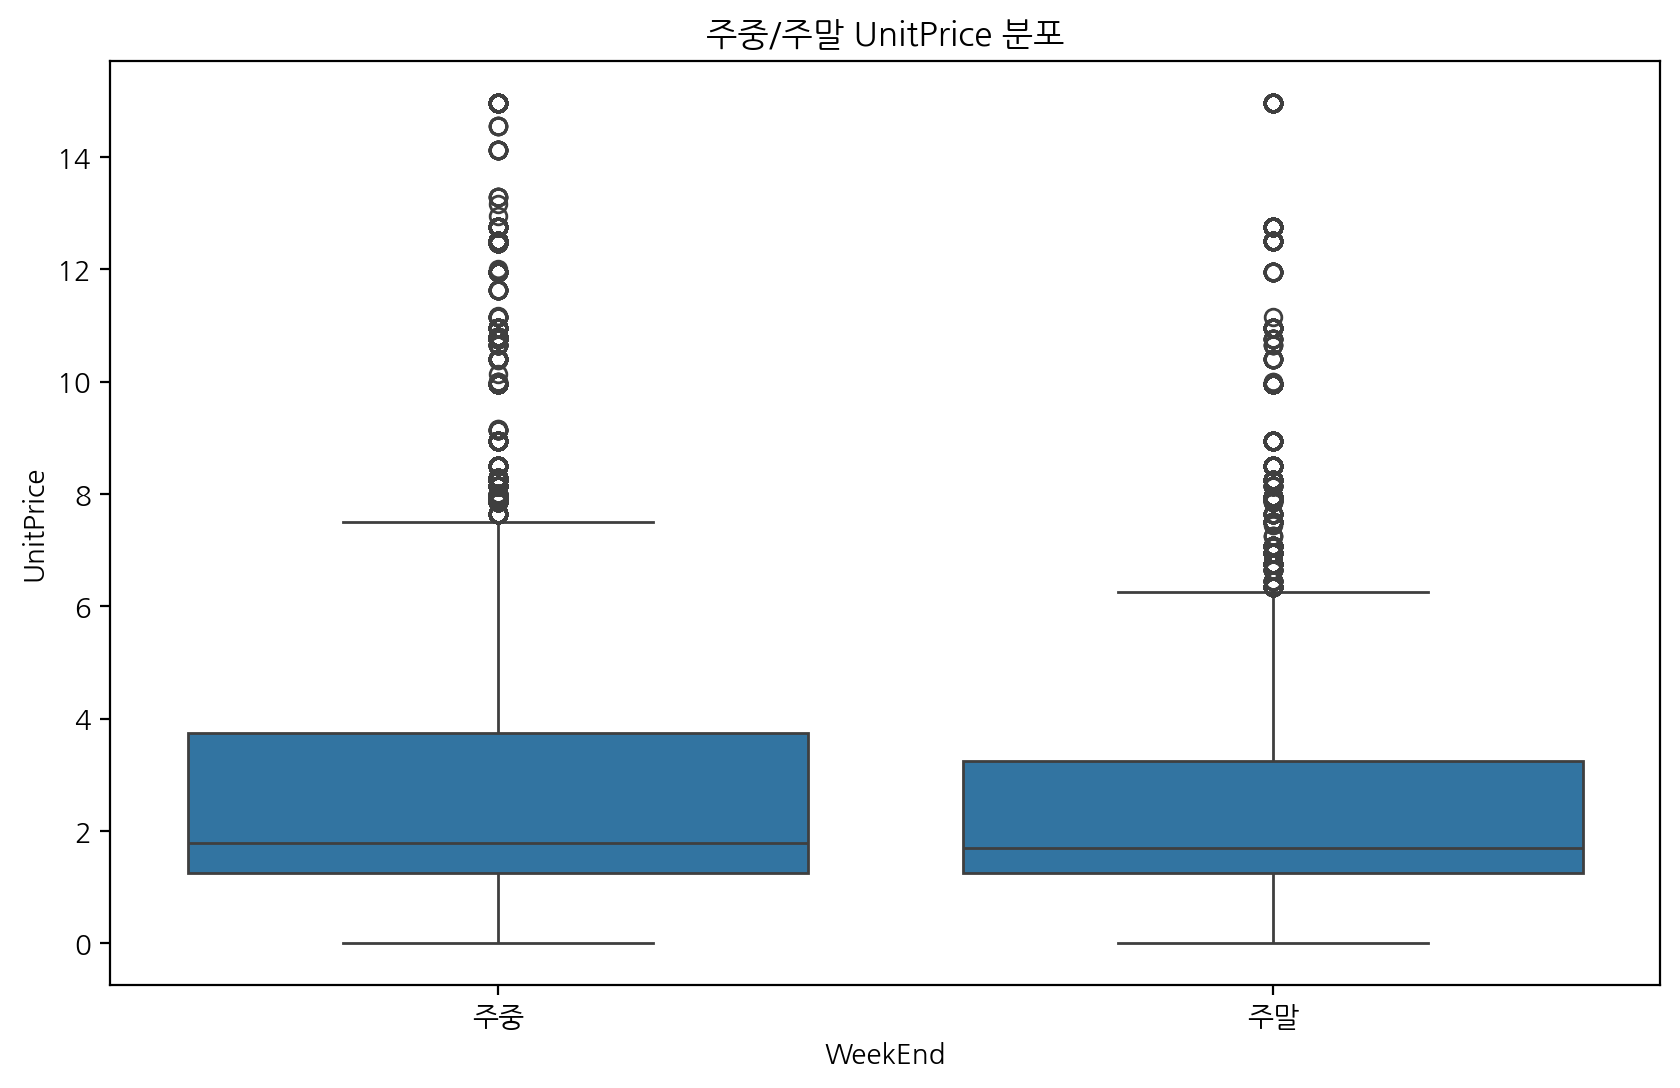

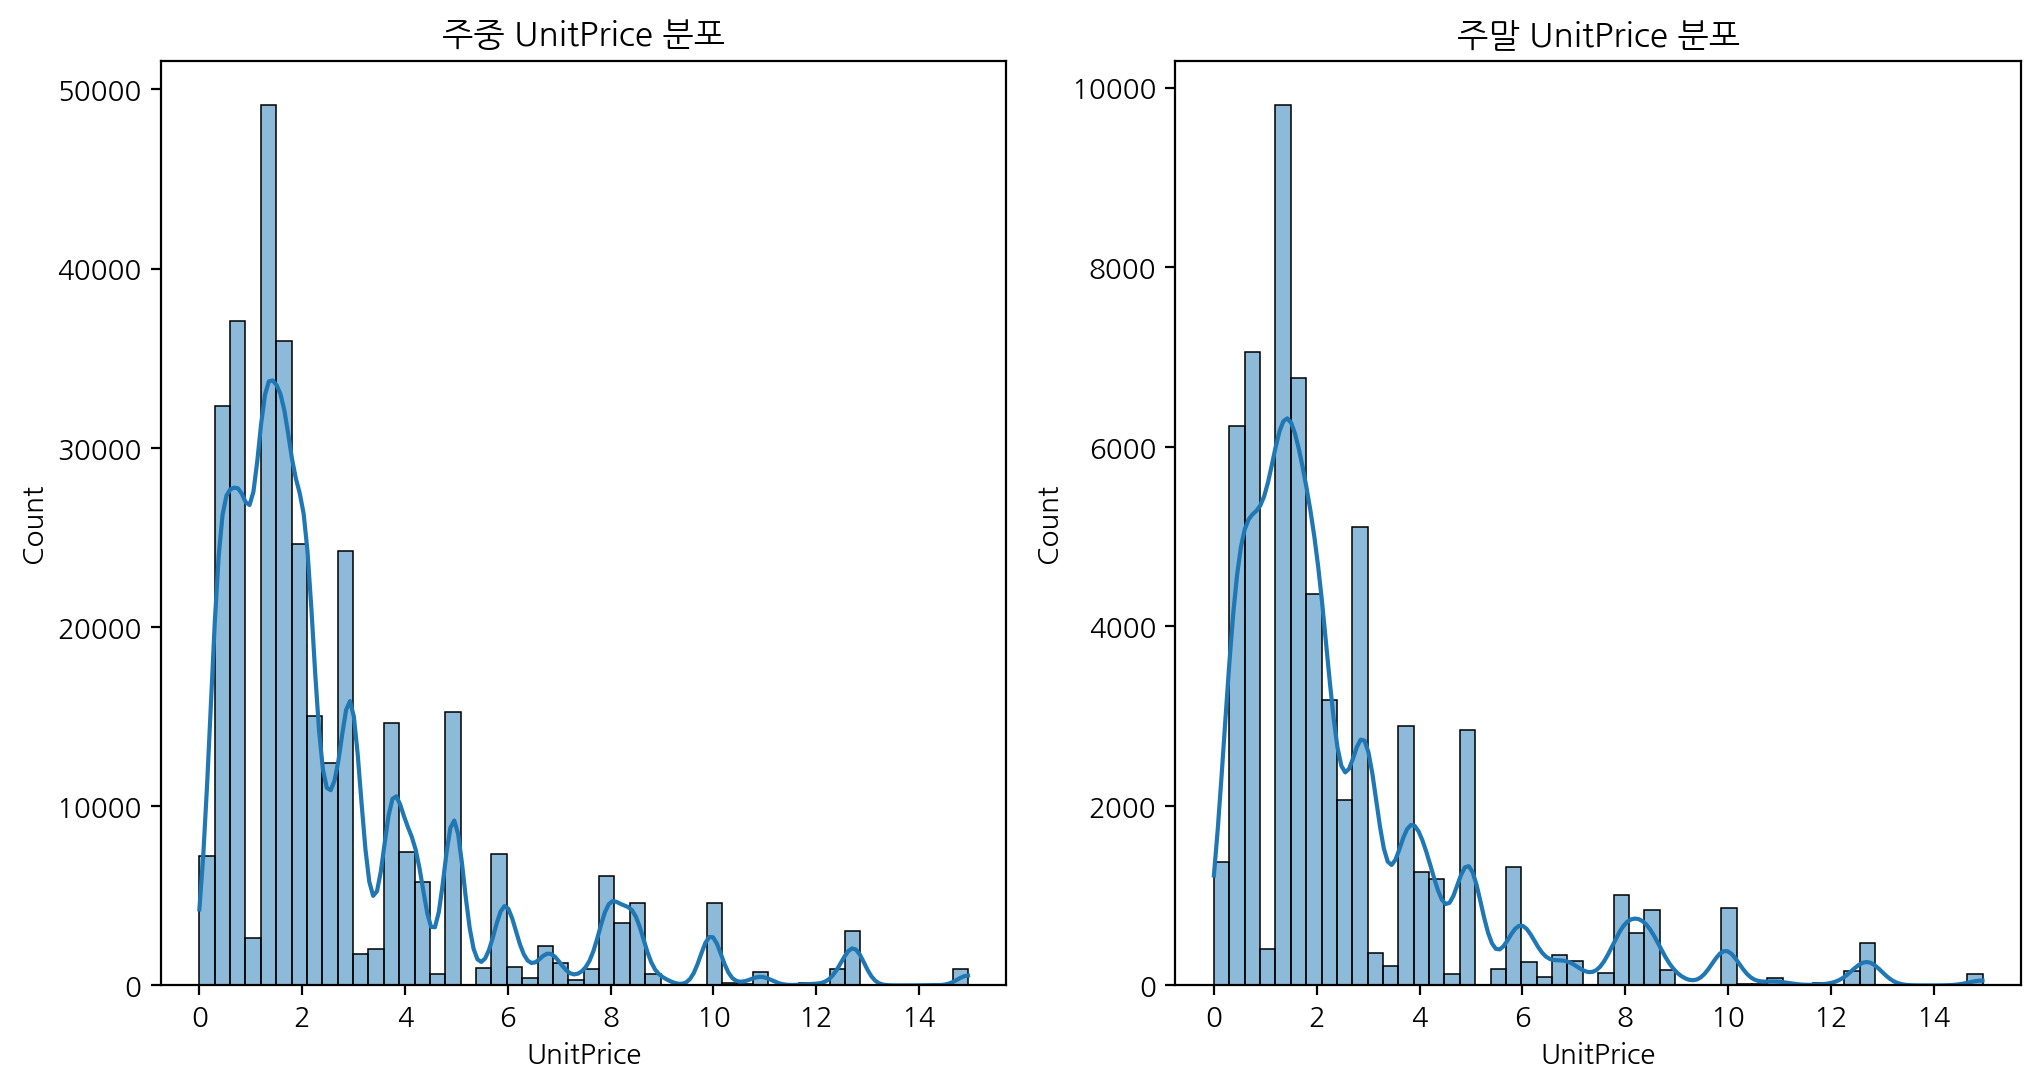

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 상자수염그림
plt.figure(figsize=(10, 6))
sns.boxplot(x='WeekEnd', y='UnitPrice', data=df)
plt.title('주중/주말 UnitPrice 분포')
plt.show()

# 2. 히스토그램
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(weekday_data['UnitPrice'], kde=True, bins=50)
plt.title('주중 UnitPrice 분포')


plt.subplot(1, 2, 2)
sns.histplot(weekend_data['UnitPrice'], kde=True, bins=50)
plt.title('주말 UnitPrice 분포')
plt.show()

In [17]:
# 3. 기술통계 및 분위수 계산
def calculate_stats(data):
    return pd.Series({
        '개수': data.count(),
        '평균': data.mean(),
        '중앙값': data.median(),
        '표준편차': data.std(),
        '분산': data.var(),
        '최소값': data.min(),
        '25%': data.quantile(0.25),
        '50%': data.quantile(0.5),
        '75%': data.quantile(0.75),
        '최대값': data.max()
    })

weekday_stats = calculate_stats(weekday_data['UnitPrice'])
weekend_stats = calculate_stats(weekend_data['UnitPrice'])

print("주중 UnitPrice 통계:")
print(weekday_stats)
print("\n주말 UnitPrice 통계:")
print(weekend_stats)

주중 UnitPrice 통계:
개수      328180.000000
평균           2.717525
중앙값          1.790000
표준편차         2.548102
분산           6.492825
최소값          0.000000
25%          1.250000
50%          1.790000
75%          3.750000
최대값         14.950000
dtype: float64

주말 UnitPrice 통계:
개수      62217.000000
평균          2.639652
중앙값         1.690000
표준편차        2.445055
분산          5.978292
최소값         0.000000
25%         1.250000
50%         1.690000
75%         3.250000
최대값        14.950000
dtype: float64


### 해석
1. 중심경향치
    - 주중: 평균(2.717525),중앙값(1.79)
    - 주말: 평균(2.639652),중앙값(1.690000)

    - 두 값의 차이를 보면, 주중의 경우 평균이 중앙값보다크다. 이는 데이터가 오른쪽으로 치우쳐 있음을 의미한다.

2. 표준편차
    - 주중: 표준편차 약 2.55
    - 주말: 표준편차 약 2.44
    - 주중의 표준편차가 주말보다 크다. 주중 데이터가 더 넓게 분포되어 있고 변동성이 크다.

3. 분위수
    - 중앙값과 75% 분위수가 주말보다 주중에서 큰 것을 알 수 있다. 주중 데이터가 전체적으로 주말 데이터 보다 높은 값을 가진다.

4. 극단값
    - 주중 : -11062 ~ 38970
    - 주말 : 0 ~ 1267
    - 주중 데이터에는 극단적인 값이 많이 포함되어 있다.



## 미션4) 심슨의 역설을 설명하기 위한 구체적인 분석을 다음의 순서로 진행해 주세요.

심슨의 역설(Simpson's Paradox)은 통계 데이터를 해석할 때 발생할 수 있는 현상으로, 일부 하위 그룹에서 관찰된 추세가 전체 데이터를 합쳤을 때 반전될 수 있음을 나타냅니다. 이 현상은 복잡한 데이터에서 하위 그룹 간에 상이한 분포나 크기 때문에 발생할 수 있습니다.

심슨의 역설을 설명하기 위해서는, 데이터 내에서 서로 상반된 추세를 보이는 하위 그룹을 찾거나 생성해야 합니다. 예를 들어, 특정 상품의 판매량이나 단가가 국가별로 다른 추세를 보이는지, 혹은 특정 기간 동안의 판매 추세가 전체 기간 동안의 추세와 다른지 등을 분석할 수 있습니다.

데이터를 제시한 특정 국가로 하위 그룹으로 나눕니다.
각 하위 그룹에서 총 판매금액의 추세를 분석합니다.
전체 데이터셋에 대해 동일한 지표를 분석합니다.
하위 그룹의 추세와 전체 데이터의 추세가 서로 다른 방향성을 보일 경우, 이를 통해 심슨의 역설을 설명합니다.
이러한 분석을 위해, 데이터 내에서 적절한 변수와 하위 그룹을 선정하는 것이 중요합니다. 현재 제공된 데이터만으로는 심슨의 역설을 바로 설명할 수 있는 명확한 예시를 찾기 어려울 수 있지만, 데이터를 깊이 분석하면 관련 현상을 발견할 수도 있습니다.
이를 이용해 비즈니스에 어떻게 활용할 수 있을지도 설명해 주세요.

```python
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]
```

In [18]:
# 전체 매출
total_revenue = df['TotalPrice'].sum()
total_revenue

6590533.284000001

In [19]:
# 국가별 매출
rev_by_countries = df.groupby('Country')['TotalPrice'].sum().sort_values()
rev_by_countries

Country
Saudi Arabia                145.920
Bahrain                     548.400
Czech Republic              786.740
RSA                        1002.310
Brazil                     1143.600
European Community         1159.250
Lithuania                  1661.060
Lebanon                    1693.880
United Arab Emirates       1864.780
Malta                      2038.690
Canada                     2581.200
Unspecified                2616.220
USA                        3563.440
Iceland                    4060.400
Greece                     4385.570
Israel                     6563.390
Poland                     6870.850
Austria                    7883.630
Singapore                  8805.390
Cyprus                    11648.590
Denmark                   12327.600
Italy                     15428.340
Finland                   15595.000
Channel Islands           17037.390
Sweden                    18562.210
Japan                     19139.930
Portugal                  26514.800
Norway              

[Text(0, 0, 'Saudi Arabia'),
 Text(1, 0, 'Bahrain'),
 Text(2, 0, 'Czech Republic'),
 Text(3, 0, 'RSA'),
 Text(4, 0, 'Brazil'),
 Text(5, 0, 'European Community'),
 Text(6, 0, 'Lithuania'),
 Text(7, 0, 'Lebanon'),
 Text(8, 0, 'United Arab Emirates'),
 Text(9, 0, 'Malta'),
 Text(10, 0, 'Canada'),
 Text(11, 0, 'Unspecified'),
 Text(12, 0, 'USA'),
 Text(13, 0, 'Iceland'),
 Text(14, 0, 'Greece'),
 Text(15, 0, 'Israel'),
 Text(16, 0, 'Poland'),
 Text(17, 0, 'Austria'),
 Text(18, 0, 'Singapore'),
 Text(19, 0, 'Cyprus'),
 Text(20, 0, 'Denmark'),
 Text(21, 0, 'Italy'),
 Text(22, 0, 'Finland'),
 Text(23, 0, 'Channel Islands'),
 Text(24, 0, 'Sweden'),
 Text(25, 0, 'Japan'),
 Text(26, 0, 'Portugal'),
 Text(27, 0, 'Norway'),
 Text(28, 0, 'Belgium'),
 Text(29, 0, 'Spain'),
 Text(30, 0, 'Switzerland'),
 Text(31, 0, 'Australia'),
 Text(32, 0, 'Netherlands'),
 Text(33, 0, 'France'),
 Text(34, 0, 'EIRE'),
 Text(35, 0, 'Germany'),
 Text(36, 0, 'United Kingdom')]

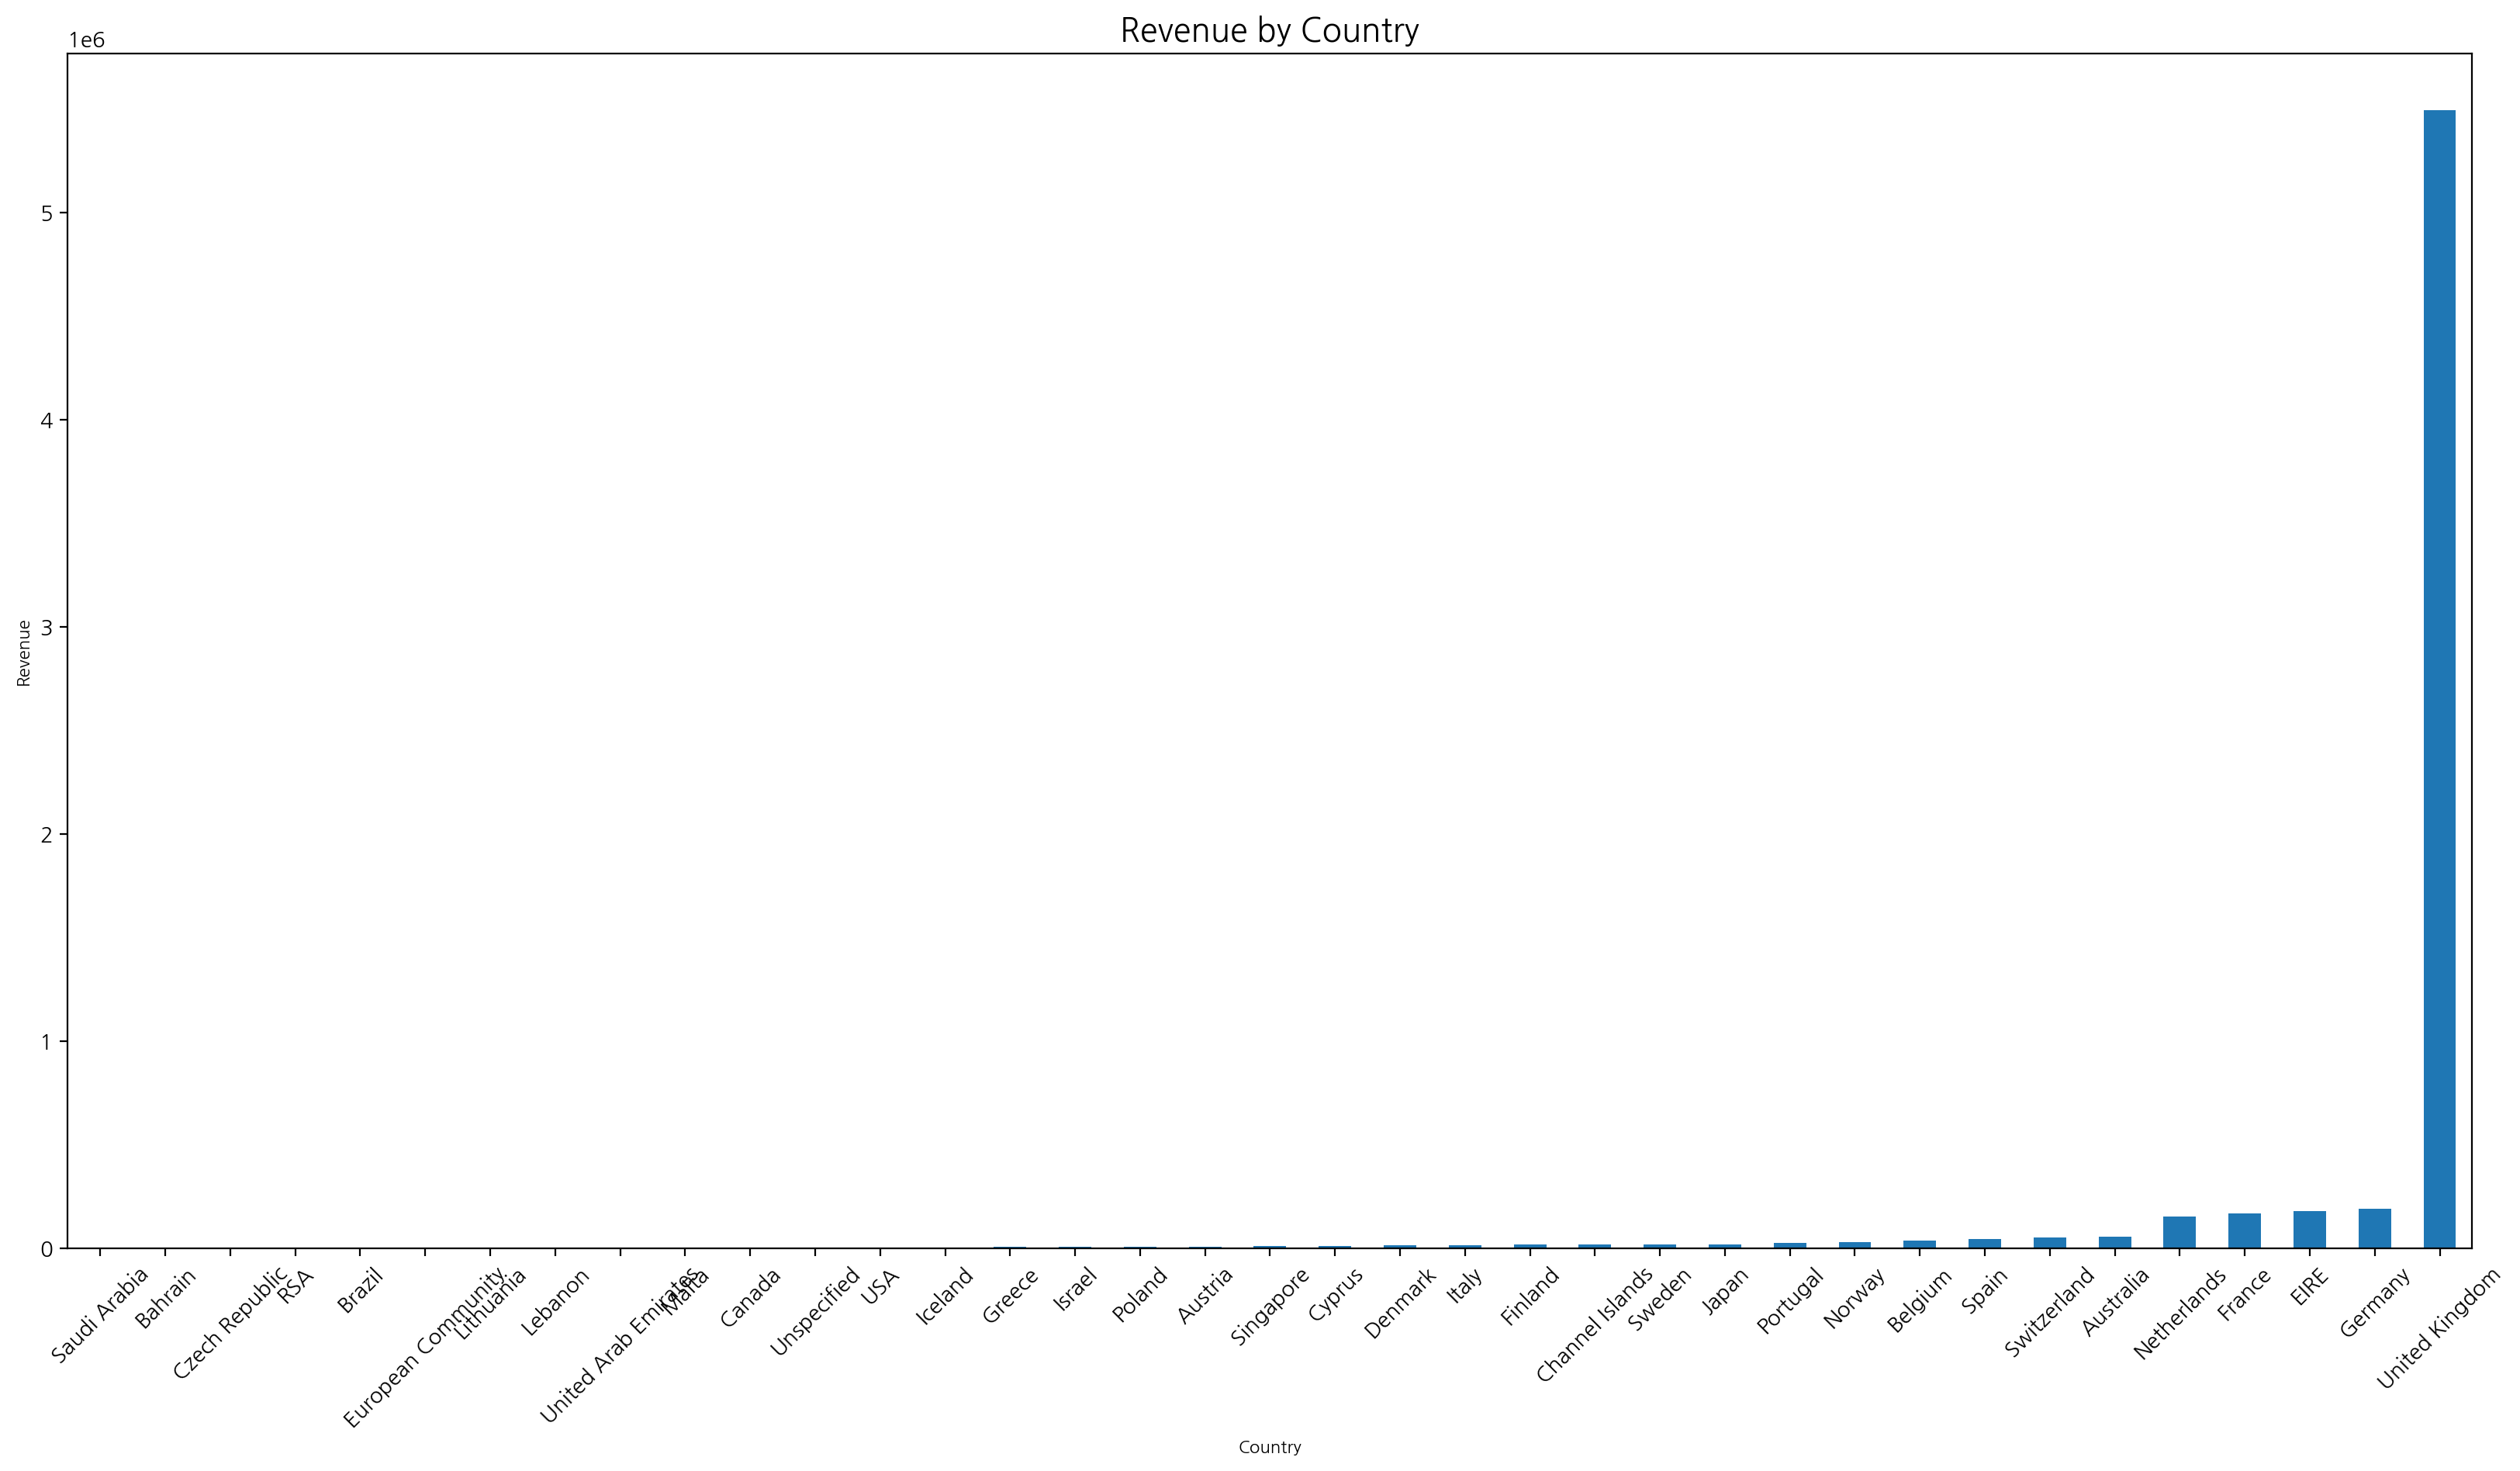

In [20]:
plot = rev_by_countries.plot(kind ='bar', figsize =(20,10))
plot.set_xlabel('Country' , fontsize = 8)
plot.set_ylabel('Revenue' , fontsize = 8)
plot.set_title('Revenue by Country' , fontsize = 15)
plot.set_xticklabels(labels = rev_by_countries.index, rotation =45)

In [21]:
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]

# 해당 국가들의 데이터만 추출
df_subset = df[df['Country'].isin(country_group)]
df_subset.groupby('Country')['TotalPrice'].sum().sort_values()

Country
Lebanon       1693.88
Canada        2581.20
USA           3563.44
Singapore     8805.39
Japan        19139.93
Name: TotalPrice, dtype: float64

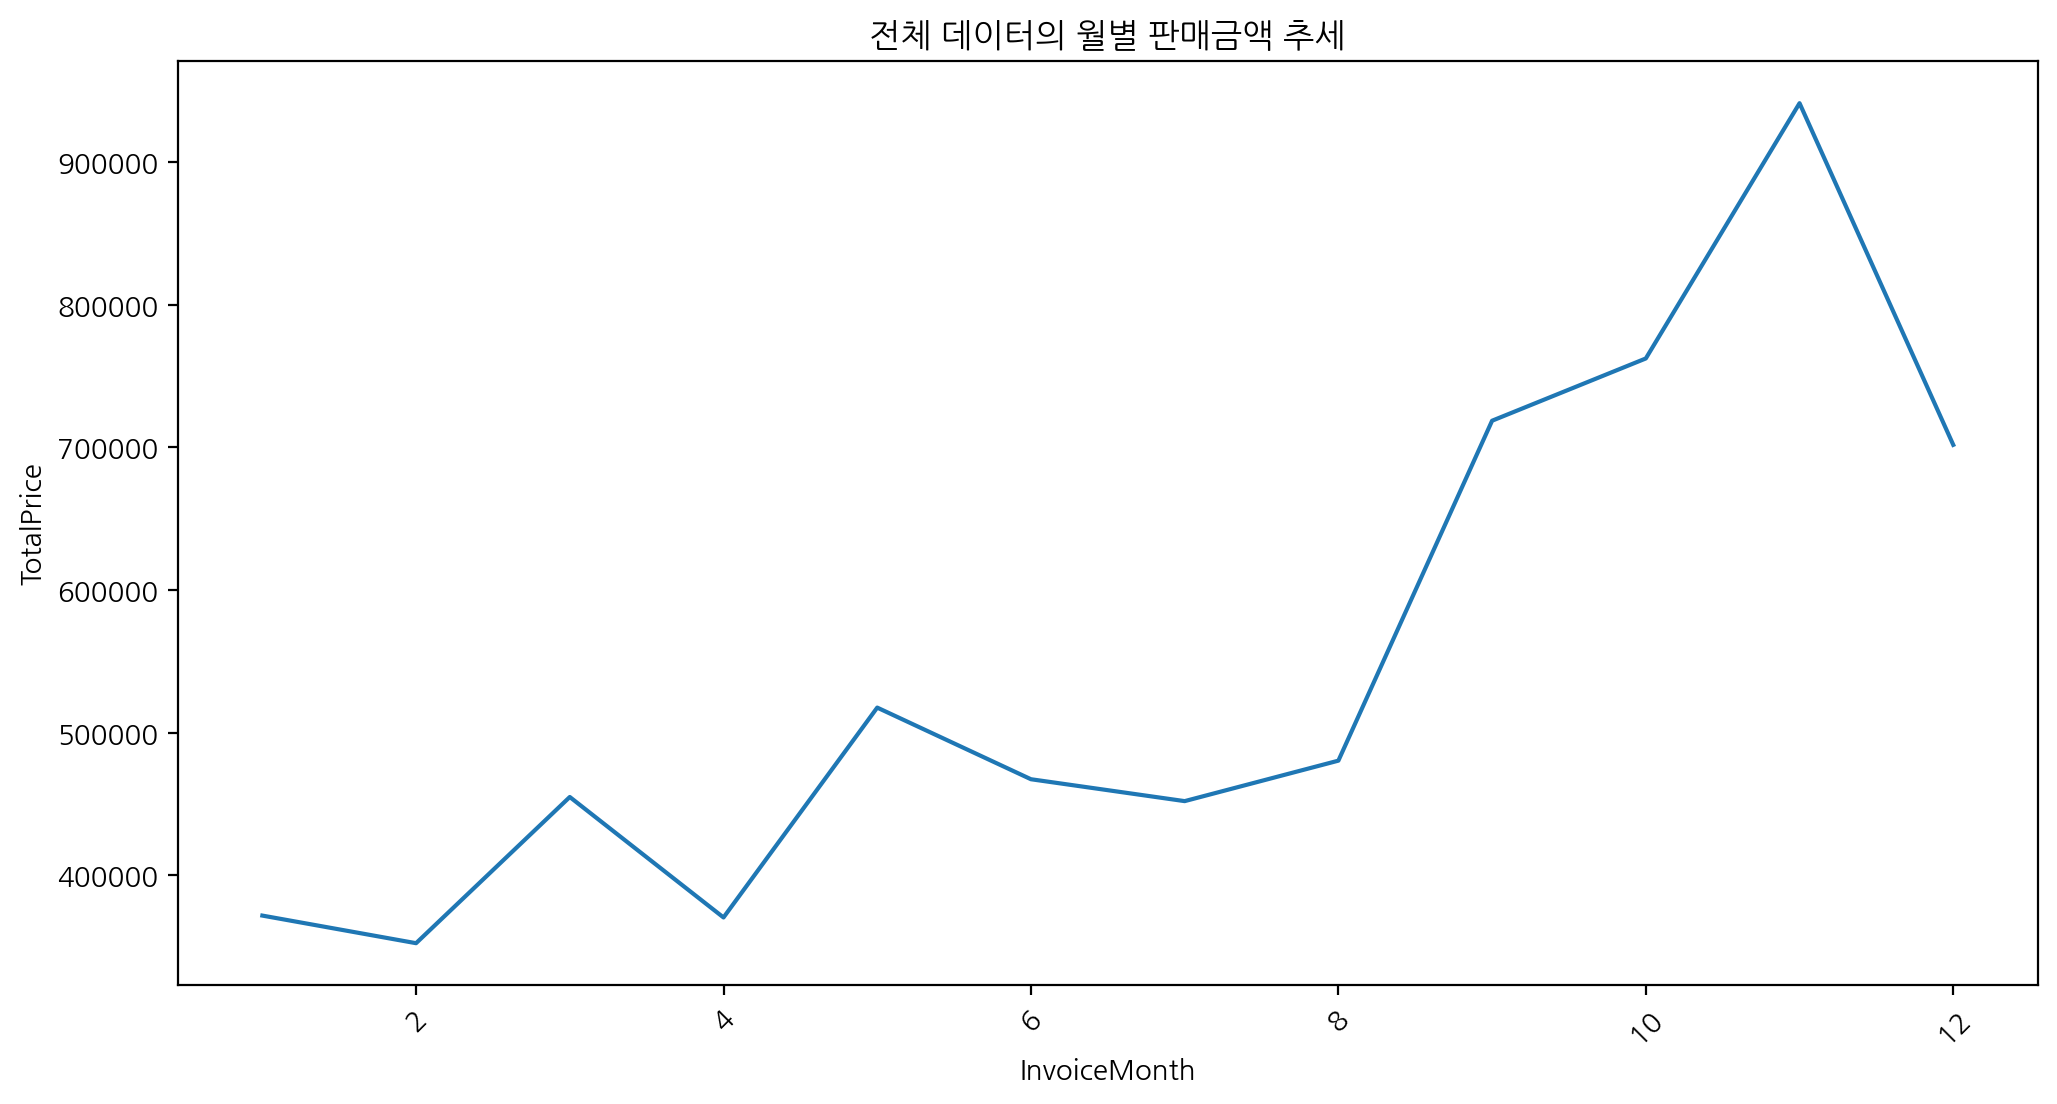

In [22]:
# 전체 데이터의 월별 판매금액 합계 계산
overall_trend = df.groupby("InvoiceMonth")['TotalPrice'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=overall_trend, x="InvoiceMonth", y='TotalPrice')
plt.title('전체 데이터의 월별 판매금액 추세')
plt.xticks(rotation=45)
plt.show()

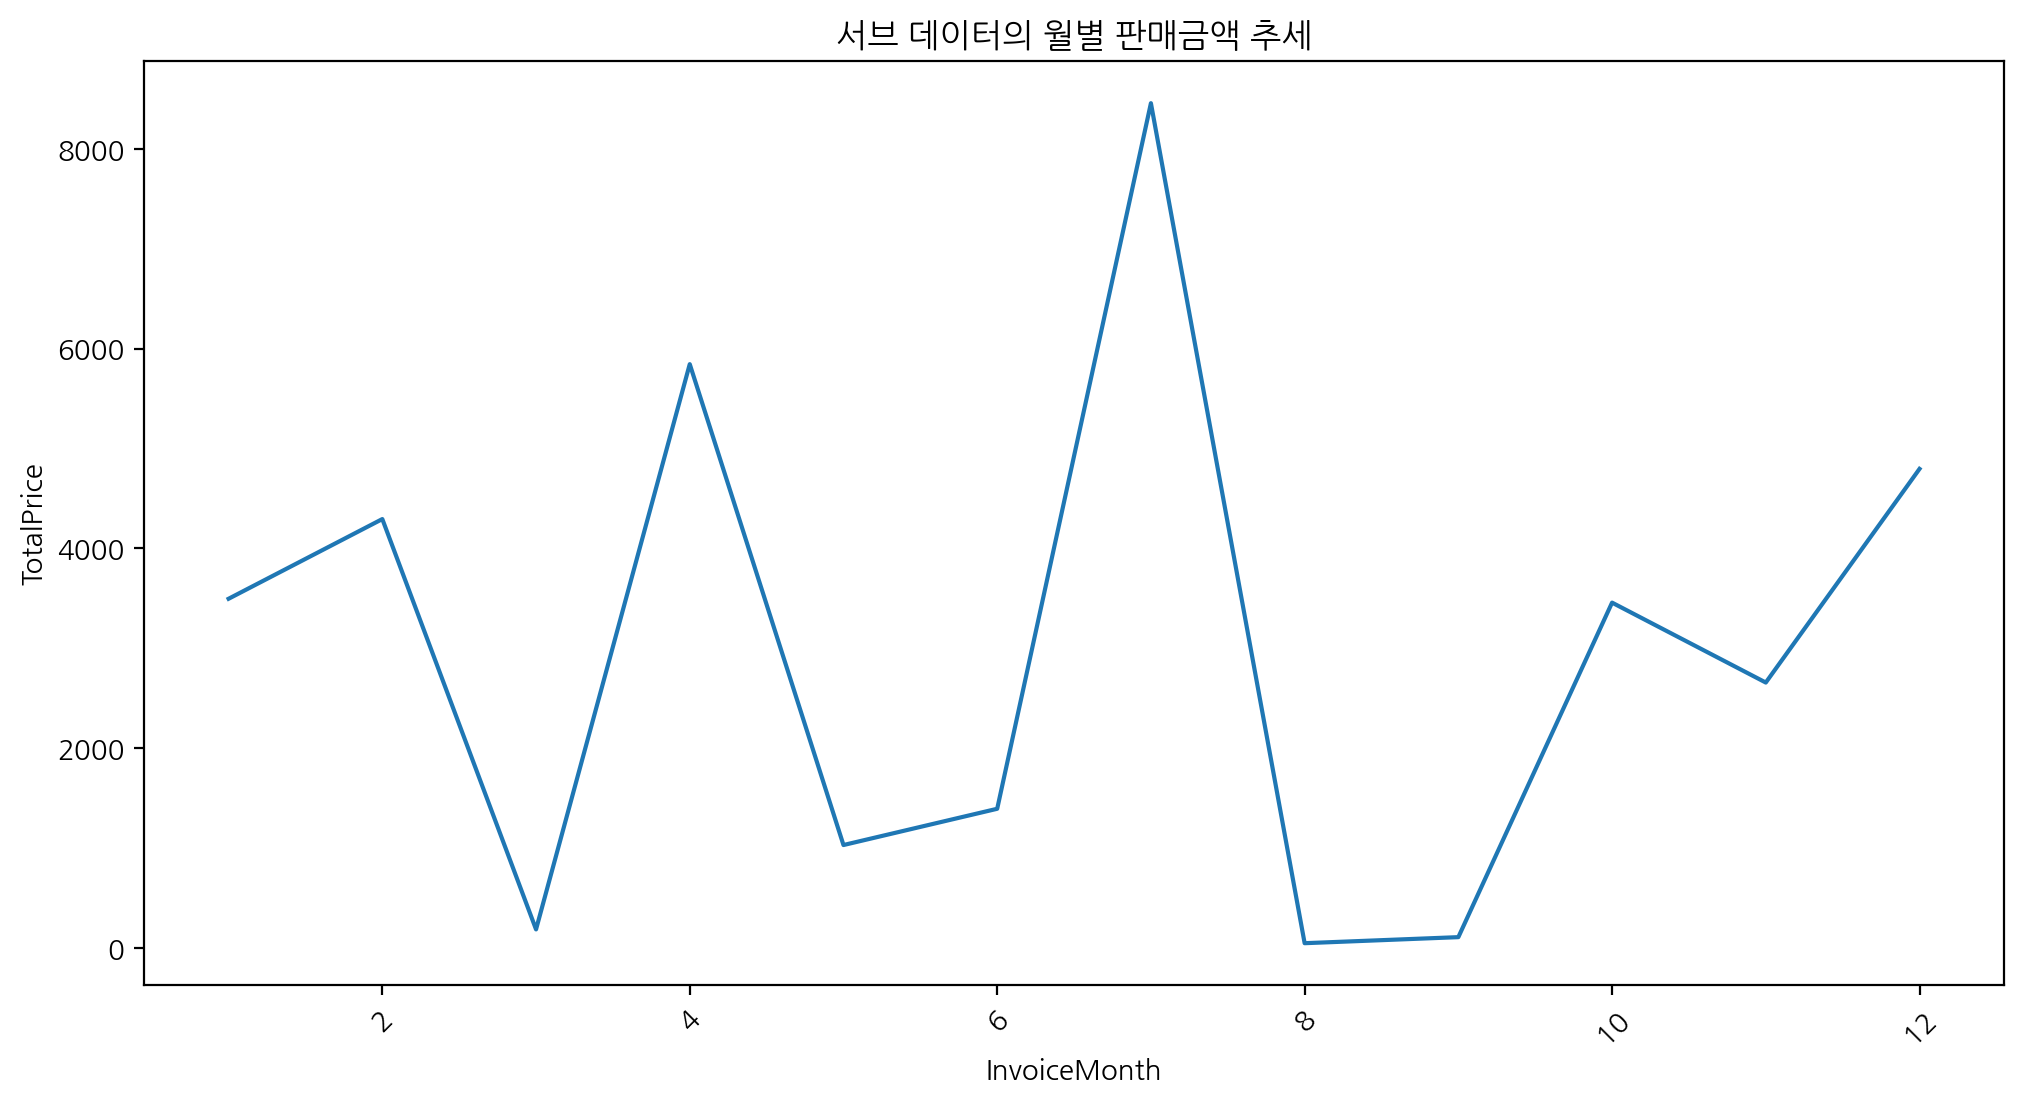

In [23]:
# 하위 그룹 데이터의 월별 판매금액 계산
subgroup_trend = df_subset.groupby("InvoiceMonth")['TotalPrice'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=subgroup_trend, x="InvoiceMonth", y='TotalPrice')
plt.title('서브 데이터의 월별 판매금액 추세')
plt.xticks(rotation=45)
plt.show()

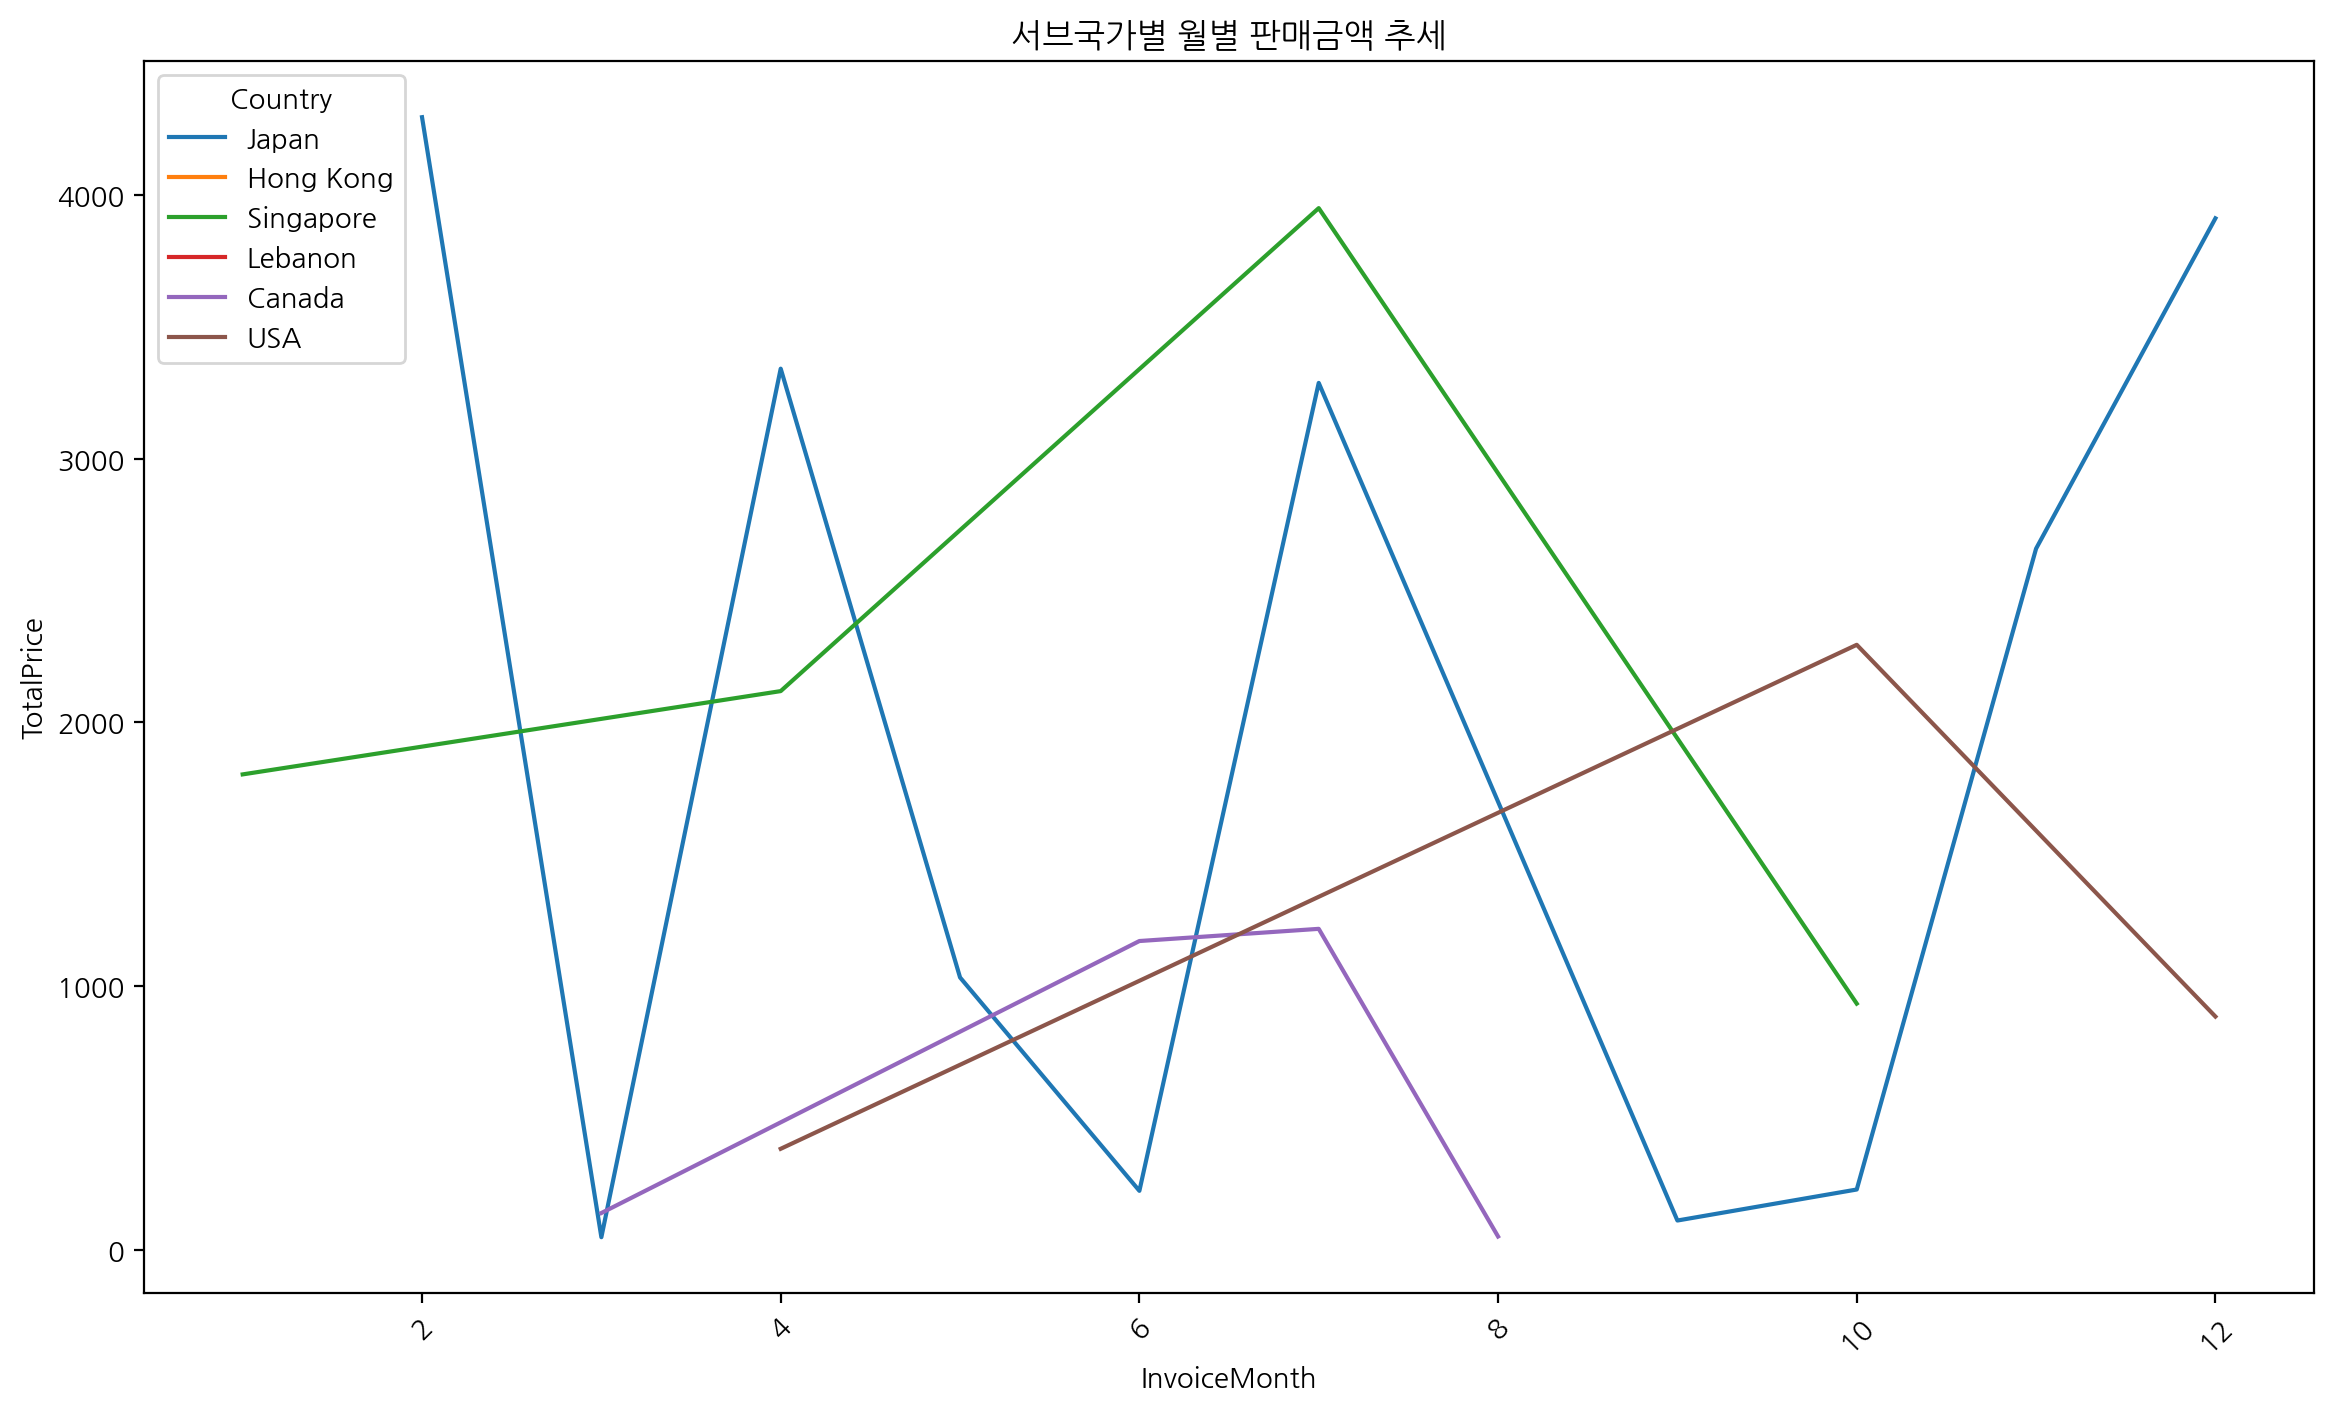

In [24]:
# 국가별 월별 평균 판매금액 계산
country_trends = df_subset.groupby(['Country', "InvoiceMonth"])['TotalPrice'].sum().reset_index()

plt.figure(figsize=(14, 8))
for country in country_group:
    country_data = country_trends[country_trends['Country'] == country]
    sns.lineplot(data=country_data, x="InvoiceMonth", y='TotalPrice', label=country)

plt.title('서브국가별 월별 판매금액 추세')
plt.legend(title='Country')
plt.xticks(rotation=45)
plt.show()

### 해석
- 전체 데이터 추세를 보면 불규칙적이긴 하지만 하반기를 지나면서 점차 증가하는 추세를 띈다.

- 하지만 주어진 나라들의 그룹의 추세를 살펴보면 이와 다르게 4월과 7월에 높은 것을 알 수 있다.

- 이는 나라별 추세 그래프를 살펴봤을 때 일본의 영향을 많이 받은 것을 알 수 있으며, 서브 국가별 매출을 살펴봤을 때 높은 일본과 싱가폴의 영향을 많이 받았다는 것을 알 수 있다.

- 이러한 경우로 전략을 세울 때 심슨의 역설을 고려하여 전체 데이터만 보고 결정을 내리면 잘못된 결론을 내릴 수 있음을 주의해야한다.

- 또한, 세분화된 분석을 하여 각 국가별로 전략을 다르게 세울 필요성에 대해서 고려해야한다.

- 제품, 가격, 마케팅 등의 전략에서도 선호되는 제품이 다르고 가격 정책을 다르게 적용하여 판매를 최적화 하는 전략을 세워야 한다.
'
- 마지막으로 특정 국가에 매출이 몰려있는 상황이기 때문에 국가별로 어떻게 리소스를 할당할 지 고민해봐야하며, 어떤 국가에 포커싱 할 지에 대한 전략도 생각해봐야한다.

## 미션5) 상품의 단가와 총 판매액의 관계를 분석해 주세요.

상품의 단가가 총 판매액에 미치는 영향을 이해하고 예측하는 것입니다. 이 분석은 가격 결정 전략을 개선하고, 수익성을 최대화하기 위해 사용될 수 있습니다.
높은 단가의 상품이 더 많은 총 판매액을 생성할 것이라는 가설을 설정합니다.

1) 데이터 전처리: 필요한 데이터를 정리하고, 결측치를 제거합니다.\
2) 단순 회귀분석: 단가(UnitPrice)를 독립변수로, 총 판매액(TotalPrice)을 종속변수로 설정하여 회귀분석을 수행합니다.\
3) 결과 해석: 회귀계수와 결정계수를 분석하여 상품 가격과 총 판매액 사이의 관계를 해석합니다.

### 1. 데이터 전처리

In [25]:
df.isnull().sum() # 고객 ID가 없는 경우가 많은데 대체할 방법이 없으므로 결측치 처리 , 설명은 없는 경우가 있으므로 처리 x

InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID      0
Country         0
TotalPrice      0
InvoiceMonth    0
DayOfWeek       0
WeekEnd         0
dtype: int64

In [26]:
df['Quantity'].value_counts() # 단가에 음수가 있으면 오류가 생길 수 있음. 이상치를 바꿔야할 필요

Quantity
1       71140
12      60029
2       57137
6       37625
4       32014
        ...  
291         1
3186        1
55          1
129         1
800         1
Name: count, Length: 162, dtype: int64

In [27]:
df['UnitPrice'].value_counts() #Totalprice와 Quantity의 관계이므로 이 부분도 0보다는 커야함.문제가 없음

UnitPrice
1.25    45765
1.65    36649
2.95    26548
0.85    25952
0.42    21786
        ...  
1.60        1
4.98        1
3.15        1
6.98        1
4.76        1
Name: count, Length: 262, dtype: int64

### 전처리 결과 값은 맨 앞으로 변경

In [28]:

# # 결측치 제거
# df_clean = df[df['CustomerID'].notnull()]
# #구입 수량이 0이상인  데이터만 저장
# df_clean = df[df['Quantity'] > 0 ]

# df_clean['TotalPrice'] = df_clean['UnitPrice'] * df_clean['Quantity']

#  # 이상치 제거
# unit_price_threshold = np.percentile(df_clean['UnitPrice'], 99)
# total_price_threshold = np.percentile(df_clean['TotalPrice'], 99)
# df_clean = df_clean[(df_clean['UnitPrice'] <= unit_price_threshold) &
#                     (df_clean['TotalPrice'] <= total_price_threshold)]
# # 위에서 기술통게 분석을 했을때 음수값이 많았는데 위의 전처리에서 음수를 제거했으므로 아래쪽 이상값은 처리가 되었다. (음수 부분이 사라졌으므로)
# # 따라서 위쪽 극단값만 처리하면 된다고 생각해서 상위값을 제거하였다.
# # 극단값 처리를 하지 않았을 시 회귀계수: 1.03 절편: 16.08 결정계수 (R^2): 0.0251 로 안좋은 결과값이 나와서 처리를 하였다.

### 2. 회귀 분석 및 시각화

회귀계수: 1.59
절편: 12.58
결정계수 (R^2): 0.0309


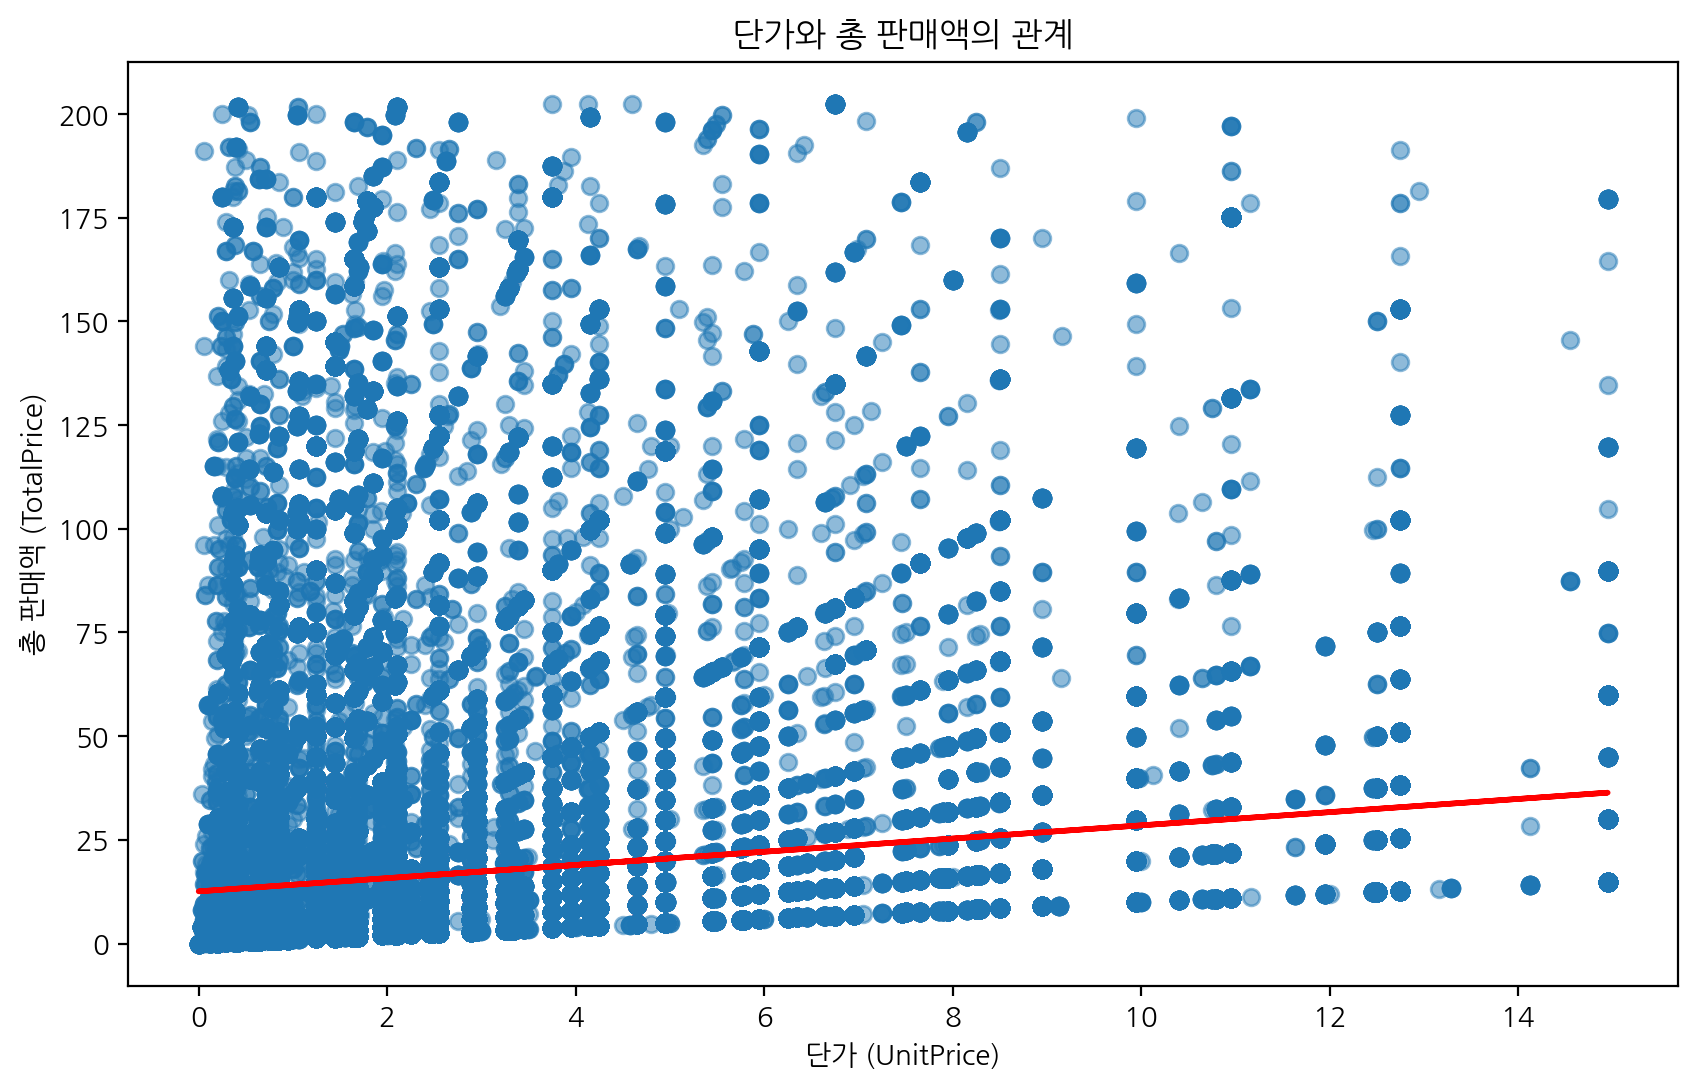

상관계수: 0.1759


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


# 2. 단순 회귀분석
X = df['UnitPrice'].values.reshape(-1, 1)
y = df['TotalPrice'].values

model = LinearRegression()
model.fit(X, y)

# 3. 결과 해석
coefficient = model.coef_[0]
intercept = model.intercept_
r_squared = r2_score(y, model.predict(X))

print(f"회귀계수: {coefficient:.2f}")
print(f"절편: {intercept:.2f}")
print(f"결정계수 (R^2): {r_squared:.4f}")

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5)
plt.plot(X, model.predict(X), color='red', linewidth=2)
plt.xlabel('단가 (UnitPrice)')
plt.ylabel('총 판매액 (TotalPrice)')
plt.title('단가와 총 판매액의 관계')
plt.show()

#상관계수
correlation = df['UnitPrice'].corr(df['TotalPrice'])
print(f"상관계수: {correlation:.4f}")

### 3. 해석

- 1. 회귀계수가 1.59이므로 단가가 증가할 때 총 판매금액도 1.59 단위로 증가한다.
- 2. 절편이 12.58이므로 단가가 0일때 총 판매금액은 12.58이다.
- 3. 결정계수가 0.0309이므로 단가는 총 판매금액의 변동을 설명할 때 3.09%의 설명력을 가진다.
- 4. 상관계수가 0.1759이므로 단가와 총 판매금액은 상관관계가 유의미하지 않다.
- 5. 단가가 총 판매금액과 선형 관계를 가진 것을 해석했지만, 설명력의 97% 해당하는 부분에 대한 추가적인 해석이 필요하다는 것을 알 수 있다.  

## 미션6) 여러 분은 크리스마스가 온라인 소매 판매에 미치는 영향을 평가하고, 이를 바탕으로 더 효과적인 가격 및 프로모션 전략을 개발해야 합니다.  

* 다음과 같은 비즈니스 전략을 고려하여 인과 분석을 합니다. 증거의 사다리로 데이터에서 얻을 수 있는 증거의 강도를 평가합니다. 크리스마스 관련 상품과 비관련 상품 간의 판매 차이를 분석합니다.


* 프로모션 전략
    * 크리스마스 상품 프로모션 강화하여 크리스마스 관련 상품의 판매를 증진시키기 위한 특별 프로모션을 개발합니다.
    * 대상 고객을 세분화하여 크리스마스 상품에 관심이 높은 고객 세그먼트를 식별하고, 이들을 대상으로 한 마케팅 캠페인을 실행합니다.
* 재고 및 공급망 관리
    * 재고 최적화를 통해 크리스마스 시즌에 대한 수요 예측을 바탕으로 재고 수준을 조절합니다.
    * 공급망 효율화를 통해 시즌별 수요 변화에 따라 공급망을 조정하여 비용을 최소화하고, 고객 만족도를 높입니다.
* 상품 다양화
    * 상품 포트폴리오를 확장하여 크리스마스 관련 상품뿐만 아니라, 다른 시즌 상품에도 주목하여 상품 포트폴리오를 다양화합니다

* 크리스마스 시즌 동안 프로모션과 상품 가격 전략이 판매에 미치는 영향을 분석하여, 미래의 프로모션 및 가격 전략을 최적화해야 합니다.



* 다음 주어진 코드를 활용합니다.


```python
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = (df_promotion["InvoiceDate"] >= "2010-12-17") & (df_promotion["InvoiceDate"] <= "2010-12-24")
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")
```

In [30]:
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = (df_promotion["InvoiceDate"] >= "2010-12-17") & (df_promotion["InvoiceDate"] <= "2010-12-24")
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")

# 총 판매액 계산
df_promotion['TotalSales'] = df_promotion['Quantity'] * df_promotion['UnitPrice']

# 기본 통계 분석
print(df_promotion.groupby(['IsChristmasPeriod', 'IsChristmasProduct'])['TotalSales'].agg(['mean', 'count']))

                                           mean  count
IsChristmasPeriod IsChristmasProduct                  
False             False               16.954359  21281
                  True                13.887405   1522
True              False               20.653142   2855
                  True                13.696774     62


크리스마스 기간 중 크리스마스 상품과 비관련 상품의 판매액 차이:
t-통계량: -1.9699704062140013
p-값: 0.04893628798423498


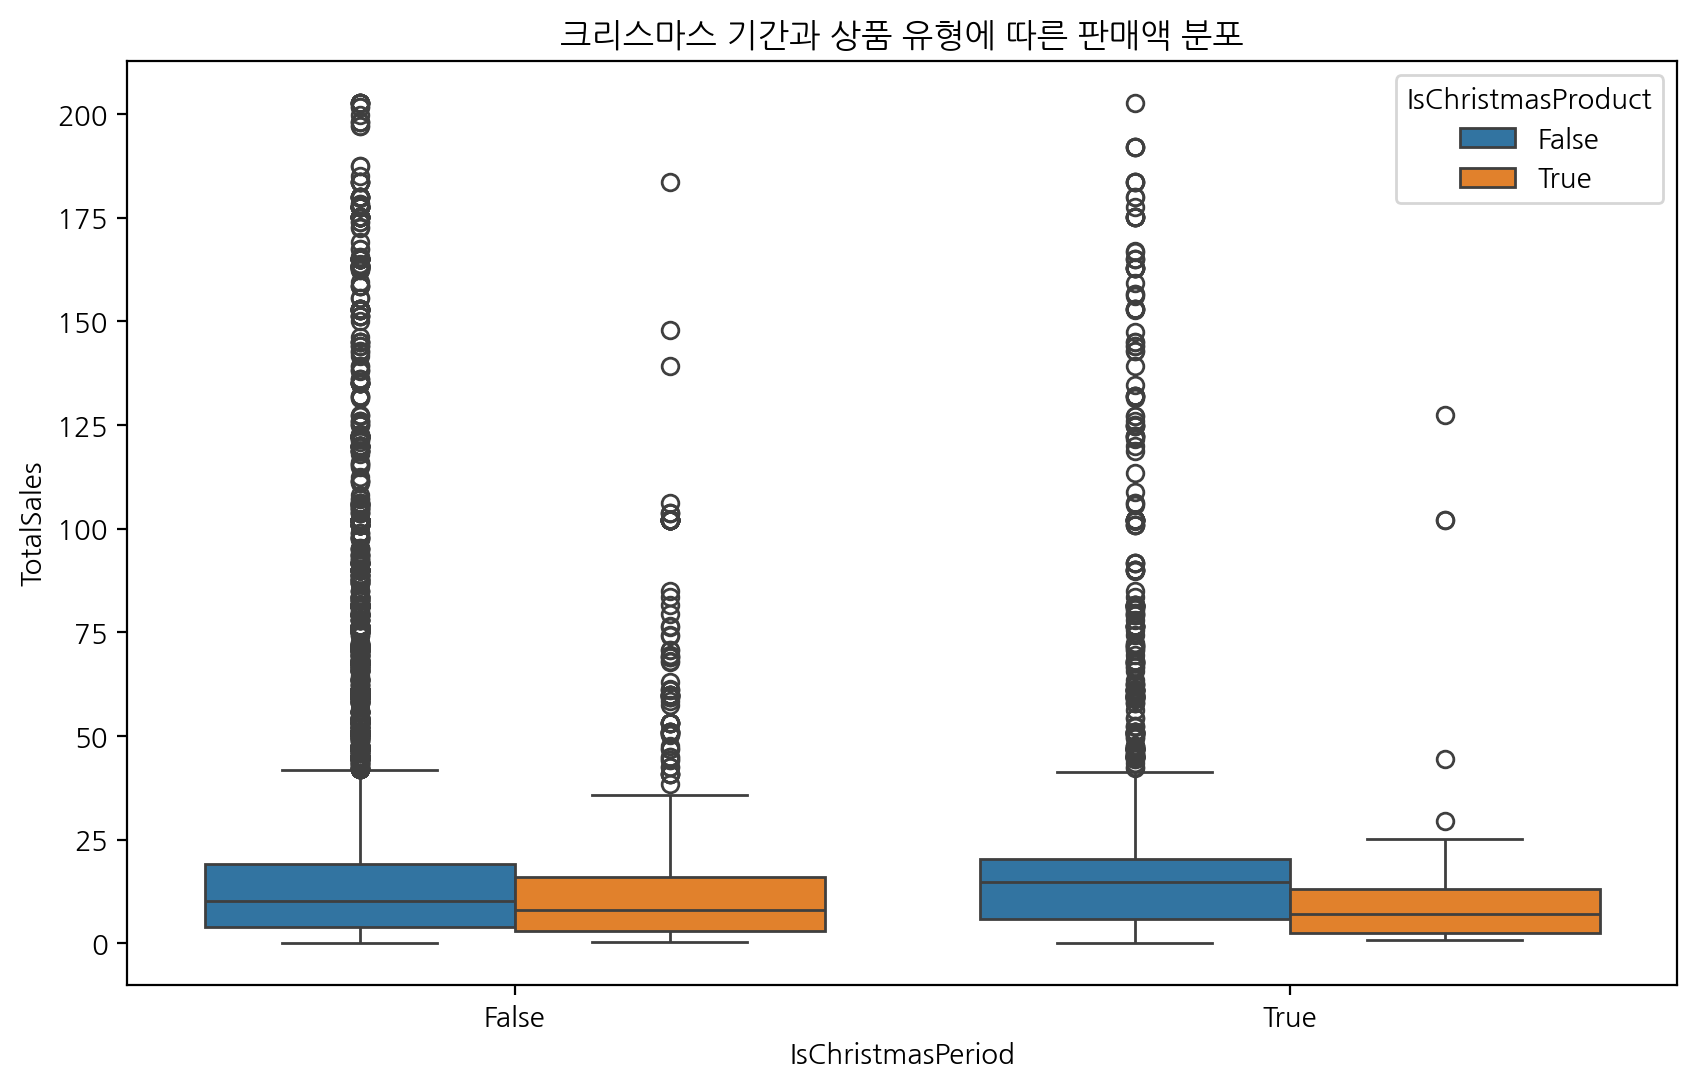

In [31]:
# 크리스마스 기간 중 크리스마스 상품과 비관련 상품의 판매액 비교
christmas_period = df_promotion[df_promotion['IsChristmasPeriod']]
christmas_products = christmas_period[christmas_period['IsChristmasProduct']]['TotalSales']
non_christmas_products = christmas_period[~christmas_period['IsChristmasProduct']]['TotalSales']

t_stat, p_value = stats.ttest_ind(christmas_products, non_christmas_products)

print(f"크리스마스 기간 중 크리스마스 상품과 비관련 상품의 판매액 차이:")
print(f"t-통계량: {t_stat}")
print(f"p-값: {p_value}")

# 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsChristmasPeriod', y='TotalSales', hue='IsChristmasProduct', data=df_promotion)
plt.title('크리스마스 기간과 상품 유형에 따른 판매액 분포')
plt.show()

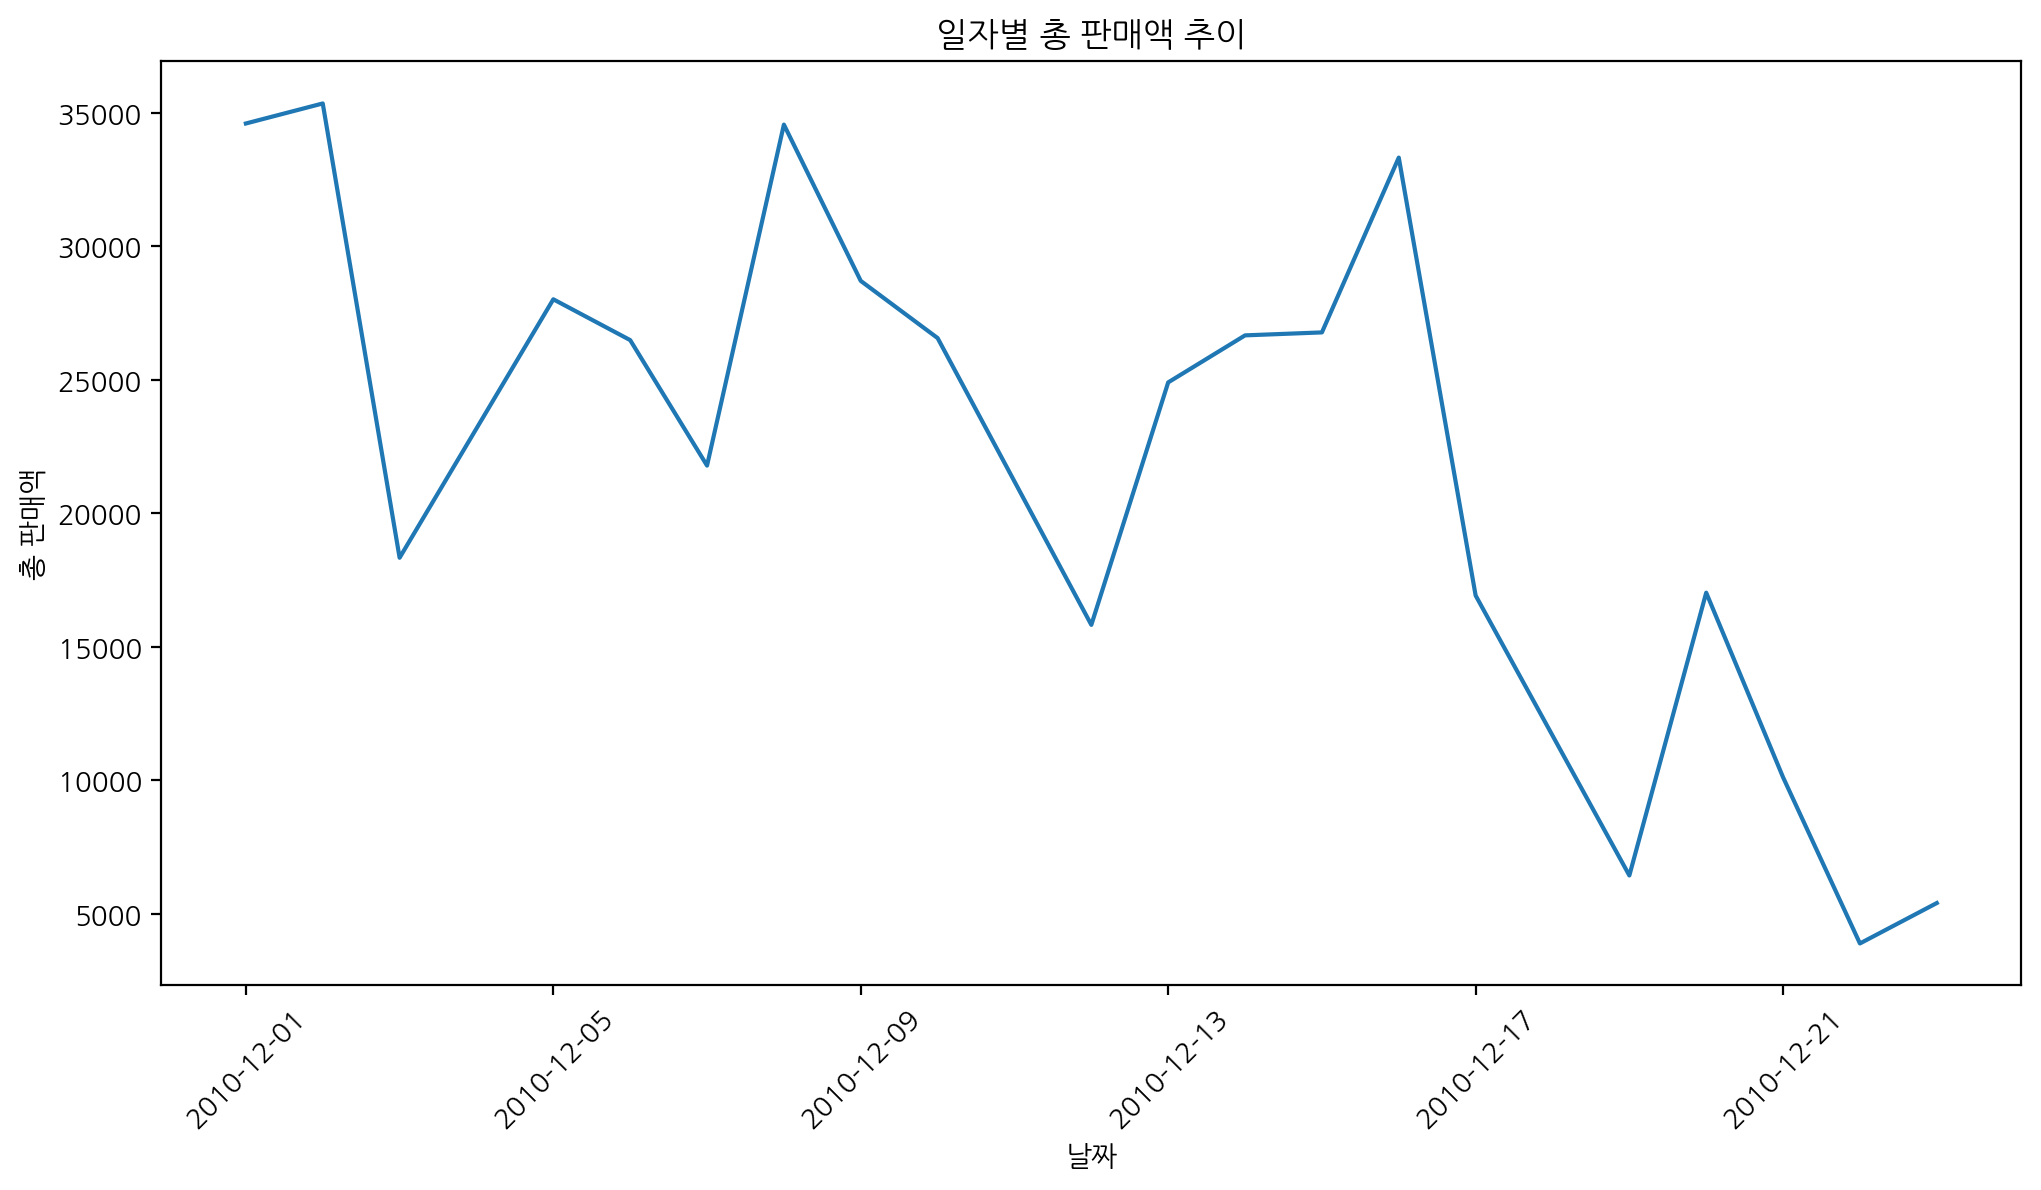

인기 크리스마스 상품 Top 5:
Description
PAPER CHAIN KIT 50'S CHRISTMAS         3339.15
PAPER CHAIN KIT VINTAGE CHRISTMAS      3042.30
CHRISTMAS LIGHTS 10 VINTAGE BAUBLES    1062.30
CHRISTMAS LIGHTS 10 REINDEER           1033.60
FELTCRAFT CHRISTMAS FAIRY               794.75
Name: TotalSales, dtype: float64


In [32]:
# 일자별 판매 추이 분석
df_promotion['Date'] = df_promotion['InvoiceDate'].dt.date
daily_sales = df_promotion.groupby('Date')['TotalSales'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Date'], daily_sales['TotalSales'])
plt.title('일자별 총 판매액 추이')
plt.xlabel('날짜')
plt.ylabel('총 판매액')
plt.xticks(rotation=45)
plt.show()

# 크리스마스 상품 Top 5
christmas_products = df_promotion[df_promotion['IsChristmasProduct']].groupby('Description')['TotalSales'].sum().nlargest(5)
print("인기 크리스마스 상품 Top 5:")
print(christmas_products)

### 결과 해석
- 1. 크리스마스 기간 크리스마스 상품과 비관련 상품의 차이는 유의미하다.(p-값 0.04893628798423498)
- 2. 일자별 판매 추이를 보면 크리스마스 기간(17~24일)보다 그 전에 구매를 하는 경우가 더 많은 것을 알 수 있다. 즉 크리스마스 선물을 크리스마스 기간보다 더 먼저 준비한다는 사실을 알 수 있다. 이에 따라 12월 초 혹은 한 주가 지난 12.9일부터라도 홍보를 해야지 효과적이라는 것을 알 수 있다.
- 3. 또한 인기 크리스마스 상품을 분석하여 효과적인 상품의 판촉을 고민해야 하는 것을 알 수 있다.

## 미션7) 다변량 회귀분석을 수행하여 크리스마스 기간 전후와 크리스마스 관련 상품과 비관련 상품 간의 판매량(Quantity) 차이를 'UnitPrice'와 'Country'와 함께 분석합니다.

* 판매량(Quantity)을 종속변수로 하여, 크리스마스 관련 상품 여부(IsChristmasProduct), 단가(UnitPrice), 국가(Country) 등을 독립변수로 포함하는 다변량 선형 회귀모델을 구축합니다.
* statsmodels 라이브러리(statsmodels.formula.api 의 ols)를 사용하여 모델을 구축하고, 결과를 해석합니다.
* 분석 결과를 해석하고, 이를 바탕으로 크리스마스 시즌 판매 전략에 대한 권장 사항을 제시합니다.
* 분석 과정과 결과, 그리고 비즈니스 전략에 대한 권장 사항을 포함하는 보고서를 작성합니다.
* 다음 주어진 코드를 활용합니다.

```python
from statsmodels.formula.api import ols

# ols.summary()를 이용해 볼 수 있습니다.
```

In [33]:
from statsmodels.formula.api import ols
# 데이터 준비
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = ((df_promotion["InvoiceDate"] >= "2010-12-17") & (df_promotion["InvoiceDate"] <= "2010-12-24")).astype(int)
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas").astype(int)

# 'TotalPrice' 계산
df_promotion['TotalPrice'] = df_promotion['Quantity'] * df_promotion['UnitPrice']

# 국가 더미 변수 생성 (상위 3개 국가만 사용)
top_countries = df_promotion['Country'].value_counts().nlargest(3).index
df_promotion['Country'] = df_promotion['Country'].apply(lambda x: x if x in top_countries else 'Other')
df_promotion = pd.get_dummies(df_promotion, columns=['Country'], prefix='Country')

# 열 이름의 공백을 언더스코어로 변경 -> 다변량 회귀분석 구축시 오류가 생김 빈칸이 나오면 안댐
df_promotion.columns = df_promotion.columns.str.replace(' ', '_')

# 변환된 열 이름 확인-> 확인 후 맞게 다변량 회귀분석 모델을 구축해야함
print(df_promotion.columns)

# 다변량 회귀분석 모델 구축
model = ols('Quantity ~ IsChristmasProduct + IsChristmasPeriod + UnitPrice + Country_United_Kingdom + Country_France + Country_France', data=df_promotion).fit()
# 결과 출력
print(model.summary())

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'TotalPrice', 'InvoiceMonth', 'DayOfWeek',
       'WeekEnd', 'IsChristmasPeriod', 'IsChristmasProduct', 'Country_France',
       'Country_Germany', 'Country_Other', 'Country_United_Kingdom'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     339.8
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        08:44:02   Log-Likelihood:            -1.1385e+05
No. Observations:               25720   AIC:                         2.277e+05
Df Residuals:                   25714   BIC:                         2.278e+05
Df Model:                           5        

- 모델 개요:
    - 종속변수: 판매량(Quantity)
    - 독립변수: 크리스마스 상품 여부(IsChristmasProduct), 크리스마스 기간 여부(IsChristmasPeriod), 단가(UnitPrice), 주요 국가(영국, 프랑스, 독일)

- 모델 성능:
    - R-squared: 0.062
    - Adjusted R-squared: 0.062

- 변수별 영향 분석:
    - a) IsChristmasProduct:
    계수: -0.1043
    p-value: 0.843
    해석: 크리스마스 관련 상품일 경우, 판매량에 유의미한 영향을 미치지 않습니다.
    - b) IsChristmasPeriod:
    계수: 2.3229
    p-value: 0.000
    해석: 크리스마스 기간 동안, 판매량이 증가합니다.
    - c) UnitPrice:
    계수: -1.7980
    p-value: 0.000
    해석: 단가가 증가할수록, 판매량이 감소합니다.
    - d) 국가별 영향:
    영국:
    계수: -9.4559
    p-value: 0.000
    해석: 영국에서 판매량이 감소합니다.
    - 프랑스:
    계수: -7.9769
    p-value: 0.000
    해석: 프랑스에서 판매량이 감소합니다.


- 비즈니스 인사이트:
    - a) 크리스마스 상품 전략:
    크리스마스 관련 상품이 판매량에 유의미한 영향을 미치지 않으므로, 크리스마스 상품의 종류나 구성을 다시 검토할 필요가 있습니다.
    - b) 시즌별 가격 전략:
    크리스마스 기간 동안 판매량이 증가하는 것을 고려하여, 시즌 프로모션과 마케팅을 강화할 수 있습니다.
    - c) 국가별 맞춤 전략:
    영국과 프랑스에서 판매량이 감소하는 경향이 있으므로, 해당 국가들에서의 맞춤형 마케팅 및 프로모션 전략이 필요합니다.

- 크리스마스 시즌 판매 전략 권장 사항:
    - a) 상품 구성:
    크리스마스 상품과 일반 상품의 최적 비율을 재검토하고, 인기 있는 크리스마스 상품 카테고리를 확대합니다.
    - b) 가격 정책:
    12월 초 ~중순까지의 기간의 가격 조정 전략을 세우고, 번들 상품 구성 및 할인 전략을 도입합니다.
    - c) 마케팅 및 프로모션:
    크리스마스 기간 전후의 마케팅 캠페인을 계획하고, 국가별 맞춤형 프로모션 전략을 마련합니다.
    크리스마스 상품에 대한 특별 할인을 제공합니다.
    크리스마스 1~2주일 전부터 집중적인 마케팅 캠페인을 실시합니다.
    크리스마스 상품 구매 고객에게 다음 구매시 사용할 수 있는 쿠폰을 제공합니다.
    - d) 재고 관리:
    크리스마스 상품과 일반 상품의 재고 비율을 조정하고, 국가별 수요 예측에 따른 재고 할당 전략을 수립합니다.
    크리스마스 상품의 재고를 12월 초부터 점진적으로 늘립니다.
    크리스마스 직후 재고 정리를 위한 할인 전략을 준비합니다.

한계점 및 추가 연구 방향:
- 크리스마스 기간보다 그 전에 구매를 한다는 분석을 통해서, 크리스마스 기간이 아닌 앞에 기간에 어떻게 전략을 세워야 할 지에 대해서 고민해봐야 합니다.


    
결론:
    이 분석을 통해 크리스마스 시즌 동안의 판매 패턴과 영향 요인을 파악할 수 있었습니다. 크리스마스 관련 상품, 시즌, 가격, 그리고 국가별 특성이 판매량에 미치는 영향을 정량적으로 분석하였고, 이를 바탕으로 다양한 전략적 제안을 도출하였습니다.








## 미션8) 온라인 소매 데이터를 사용하여 고객이 특정 상품을 구매할지 여부를 예측합니다.
이 예측 모델을 사용하여 타겟 마케팅 전략을 수립하고, 재고 관리를 최적화합니다. 고객의 특정 상품 구매 여부(구매/미구매)를 예측하는 이진 분류 모델을 구축합니다.


1) 타겟 변수 생성: 'WHITE HANGING HEART T-LIGHT HOLDER' 상품을 구매했는지 여부를 나타내는 이진 타겟 변수(0: 미구매, 1: 구매)를 생성합니다.\
2) 특성(feature) 선택: 구매 예측에 영향을 미칠 수 있는 변수들을 선택합니다. 예를 들어, 'UnitPrice', 'Quantity', 'CustomerID', 'Country' 등이 될 수 있습니다.\
3) 범주형 변수 처리: 'Country'와 같은 범주형 변수를 숫자로 변환합니다. 원-핫 인코딩 등을 사용할 수 있습니다.\
4) 데이터 분할: 모델 학습을 위해 데이터를 훈련 세트와 테스트 세트로 분할합니다.\
5) 로지스틱 회귀 모델 생성 및 학습합니다.\
6) 모델을 평가 합니다.

In [34]:
df = df[pd.notnull(df['CustomerID'])]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 390397 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     390397 non-null  category      
 1   StockCode     390397 non-null  category      
 2   Description   390397 non-null  category      
 3   Quantity      390397 non-null  int32         
 4   InvoiceDate   390397 non-null  datetime64[ns]
 5   UnitPrice     390397 non-null  float64       
 6   CustomerID    390397 non-null  float32       
 7   Country       390397 non-null  object        
 8   TotalPrice    390397 non-null  float64       
 9   InvoiceMonth  390397 non-null  int32         
 10  DayOfWeek     390397 non-null  int32         
 11  WeekEnd       390397 non-null  object        
dtypes: category(3), datetime64[ns](1), float32(1), float64(2), int32(3), object(2)
memory usage: 27.6+ MB


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
# 1. 타겟 변수 생성
target_product = 'WHITE HANGING HEART T-LIGHT HOLDER'
df['Target'] = (df['Description'] == target_product).astype(int)
class_counts = df['Target'].value_counts()
print(class_counts)

# 2. 특성 선택
features = ['UnitPrice', 'Quantity', 'CustomerID', 'Country']
X = df[features]
y = df['Target']

# 3. 범주형 변수 처리
X = pd.get_dummies(X, columns=['Country'], drop_first=True)

# 4. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 결과가 유의미 하지 않아, 불균형적인 데이터라서 SMOTE를 이용해 보완
#  오버샘플링 적용
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression(random_state=42, class_weight='balanced') #소수 데이터에 가중치 부여
model.fit(X_train_scaled, y_train)

# 6. 모델 평가
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"모델 정확도: {accuracy:.2f}")
print("\n분류 보고서:")
print(class_report)



Target
0    388421
1      1976
Name: count, dtype: int64
모델 정확도: 0.51

분류 보고서:
              precision    recall  f1-score   support

           0       1.00      0.51      0.67     77699
           1       0.01      0.81      0.02       381

    accuracy                           0.51     78080
   macro avg       0.50      0.66      0.34     78080
weighted avg       0.99      0.51      0.67     78080



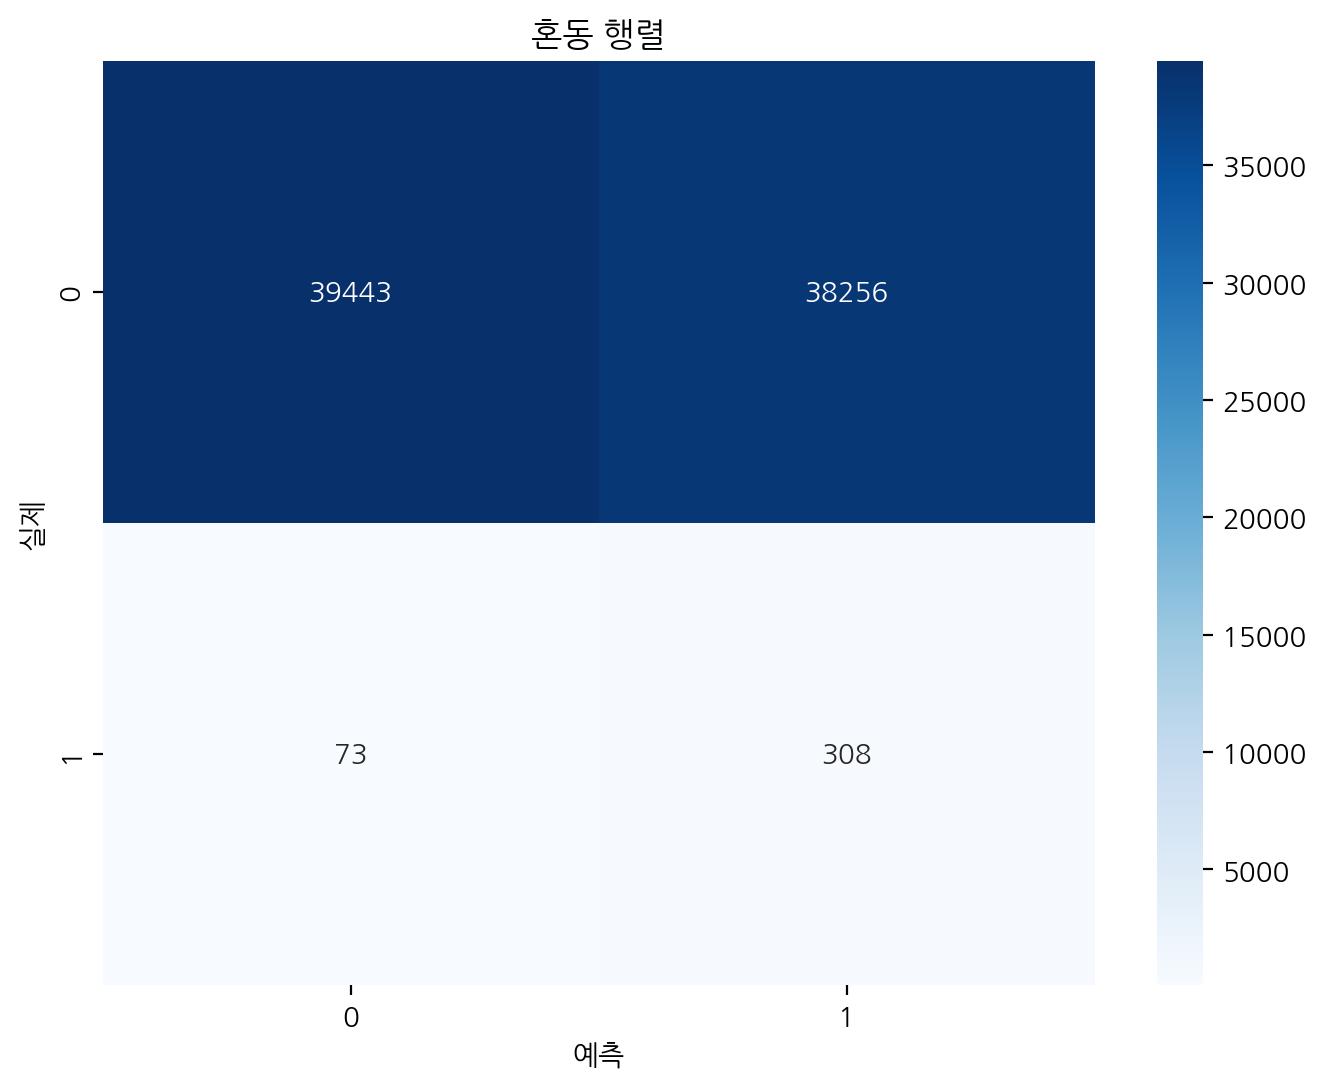

In [37]:
# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('혼동 행렬')
plt.xlabel('예측')
plt.ylabel('실제')
plt.show()


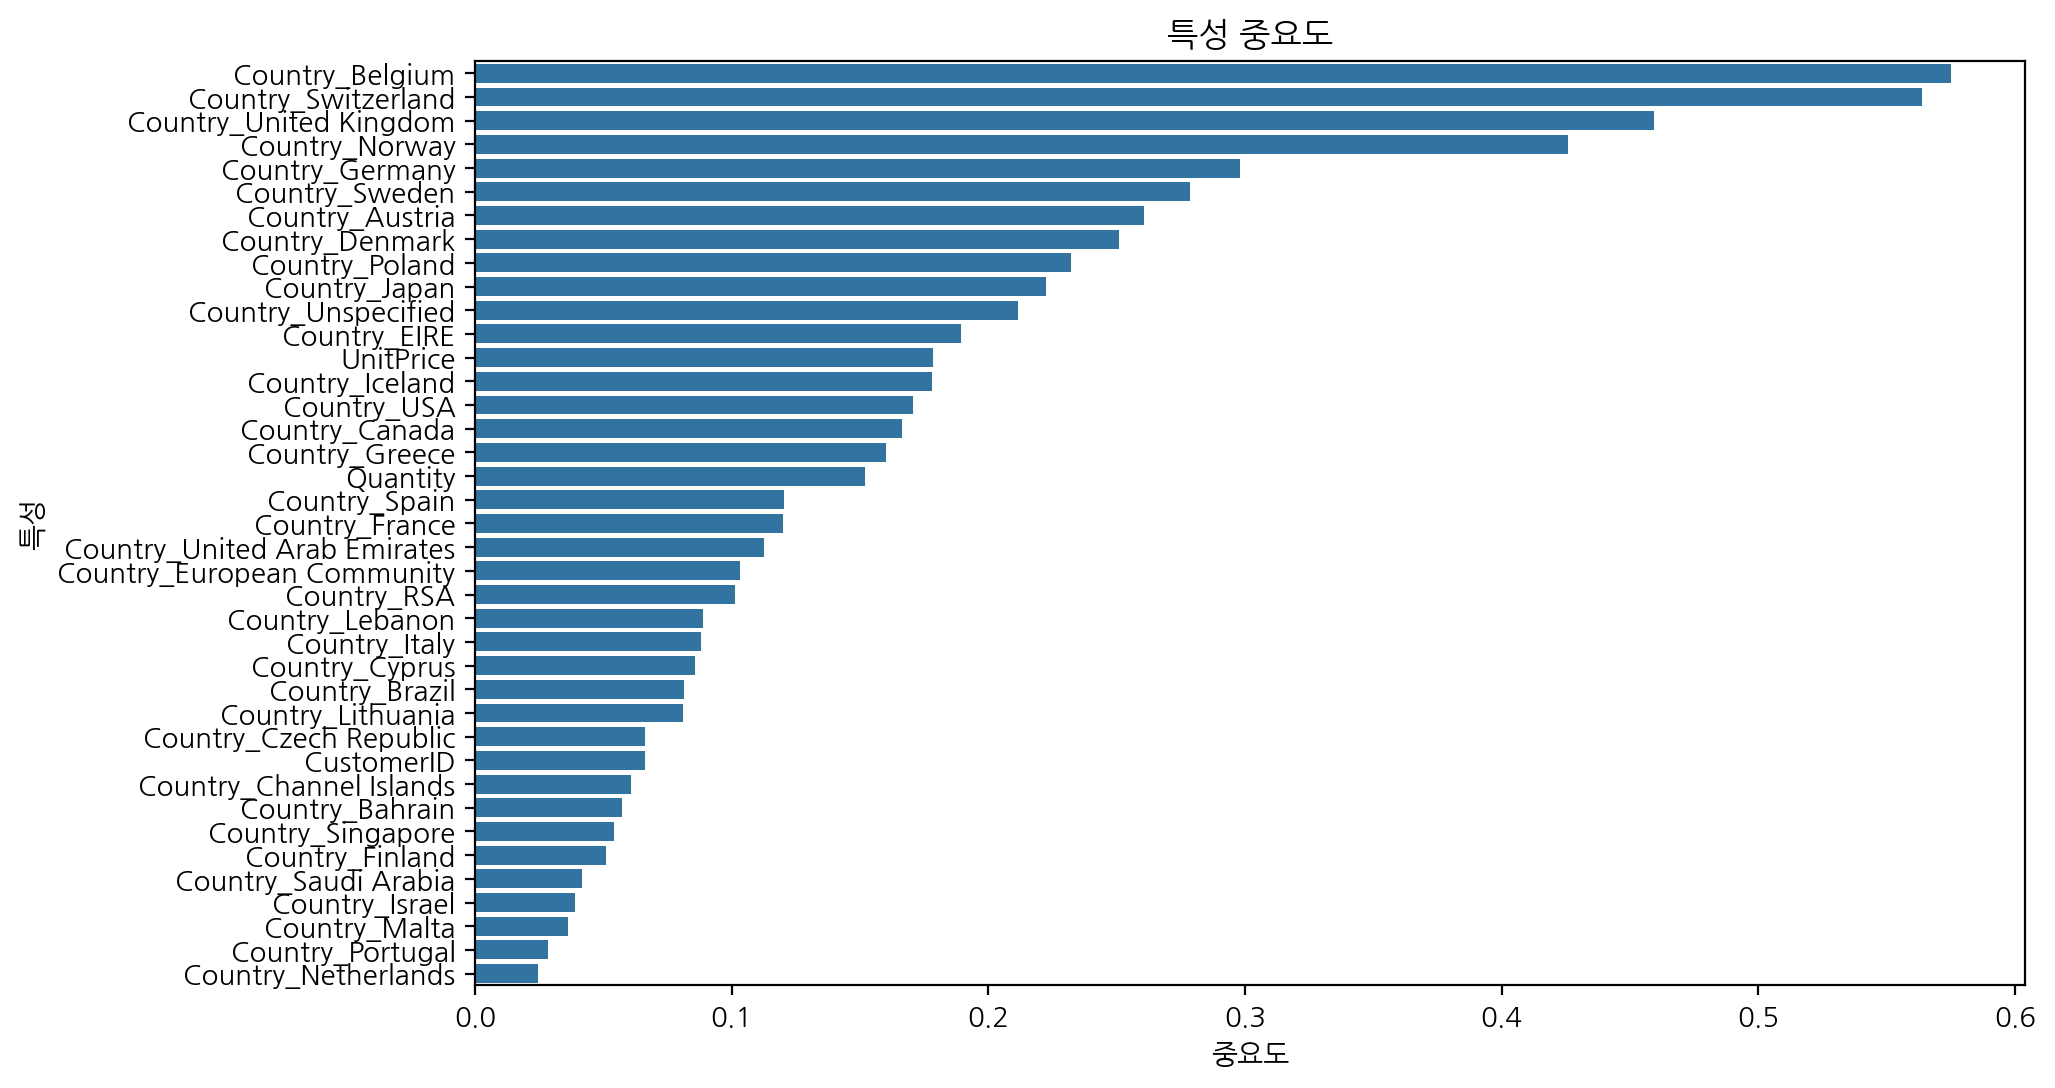

In [38]:
# 특성 중요도 시각화
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(model.coef_[0])})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('특성 중요도')
plt.xlabel('중요도')
plt.ylabel('특성')
plt.show()

### 해석
1. 기존의 방식대로 로지스틱회귀만 적용한 결과를 보니 판별하는 1에 대해서 전혀 구별을 할 수 없는 결과가 나왔다. SMOTE와 가중치를 부여하여 조금은 점수를 올렸지만 여전히 결과가 너무 불확실하다. (제대로 판별하지 못한다)
2. 혼동행렬을 시각화하여 보니 1에 대해서 모두 0으로 판별을 하여 학습을 제대로 못하는 것을 알 수 있다.
3. 특성 중요도를 보니, 영국의 특성 중요도가 너무 높아, 제대로 모델이 학습을 하지 못한다는 것을 알 수 있다.

# 회고
- 범주형 데이터 get dummies하는 부분에서 에러가 생겨서 또 확인을 헀다.
- 전처리를 해놓고 전체 미션에 적용하지 않아서 다시 작업을 했다.
- 데이터 전처리를 하니까 미션 1,2,3,4가 모두 다 바뀌어서 새롭게 작성을 했다. 데이터 분석은 데이터 전처리가 가장 밑바탕이라는 것을 배웠다.
- 한쪽으로 불균형이 많은 즉 특정한 소수의 값을 판별하는 (ex 이상탐지)와 같은 모델을 적용하는 것은 많은 것을 고려해야한다는 것을 다시 한번 느꼈다.
- 이상치 제거하는 부분에서 99%정도로 고려를 헀는데 좀 더 시원하게 처리를 했으면 시각화가 예쁘게 되었을 거 같은 후회가 든다.